1. <s> POR vs EXP color in trend charts</s>:  
    *  <s> add col for POR or exp </s> 
    * <s> group by por and exp, then plot each group on same figure </s> 
+ median value trend charts for POR -   
    * new df with median values by por and exp
* add yline for solution change, target change, POR change, etc
+ <s> plot by exp # instead of date </s>
* filter by meas no eff
+ fulltrends df with historical process, ivt, exp, xrf, etc

In [2]:
from IPython.display import Javascript, display
from ipywidgets import widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Click here to update tables + charts:")
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import sqlalchemy as sa
import glob
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.plotly as py
from plotly.graph_objs import *
import datetime
%matplotlib inline  
#%pylab inline
pylab.rcParams['figure.figsize'] = (15, 25)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import qgrid
qgrid.nbinstall(overwrite=True) 
qgrid.set_defaults(remote_js=True, show_toolbar=True)

engine = sa.create_engine('mysql+pymysql://root:turnD0wn4wh@t?@localhost/rsi?charset=utf8')
conn = engine.connect()

## update tables and send to db

##### process log

In [4]:
#updates process table in db and creates process df
df = pd.read_excel("//SERVER01/Public/ProcessingData_6in_R&DLine.xlsx", header=0)
df.to_sql('process', conn, if_exists='replace', index = True, index_label='process_index')

#del processdf
processdf = df
#qgrid.show_grid(processdf)

In [5]:
#update once a week
process_df_list = []
p = "//SERVER01/Public/Processing Data and Experiment Logs Archives and Backup/ProcessingData_6in_R&DLine_*.xlsx"
processFiles = glob.glob(p)

for i,f in enumerate(processFiles):
    sys.stdout.write('\r')
    sys.stdout.write(str(i))
    sys.stdout.flush()
    
    df_1 = pd.read_excel(f, header = 0)
    process_df_list.append(df_1)

process_df_list = pd.concat(process_df_list)

oldp = pd.DataFrame(process_df_list)
oldp1 = oldp.reindex_axis(df.columns, axis=1)

#del processdf
fprocessdf = pd.concat([oldp1, df])
fprocessdf
fprocessdf.to_sql('fullprocess', conn, if_exists='replace', index = True, index_label='fullprocess_index')

11

##### experiment log

In [6]:
#creates expdf
df2 = pd.read_excel("//SERVER01/Public/ExperimentLog.xlsx", header=0, parse_cols=[0,1,2,3,4,5,6,8])

#df2.dropna(axis=1, how='all') #remove na col

#df2["Experiment_ID"] = df2["Experiment_ID"].str.replace("Exp_","").astype(float)
#df2["Experiment_ID"] = df2["Experiment_ID"].str.replace("EXP_","").astype(float)

df2['Experiment_ID'] = df2['Experiment_ID'].str.replace("Exp_","")
df2['Experiment_ID'] = df2['Experiment_ID'].str.replace("EXP_","")
df2['Experiment_ID'] = df2['Experiment_ID'].astype(float)

#del expdf
expdf = df2

#def mask(df, f):
#    return df[f(df)]
#def mask(df, key, value):
#    return df[df[key] == value]
#df.mask('A', 1).mask('D', 6)

#add POR or EXP classification
expdf['POR'] = 'EXP'
mask1 = expdf.Split1.str.contains('.*POR.*', na=False)
expdf.loc[:,'POR'][mask1] = 'POR'
#expdf.mask('POR',)
mask2 = expdf.Split2.str.contains('.*POR.*', na=False)
expdf.loc[:,'POR'][mask2] = 'POR'
mask3 = expdf.Split3.str.contains('.*POR.*', na=False)
expdf.loc[:,'POR'][mask3] = 'POR'
mask4 = expdf.Description.str.contains('.*POR.*', na=False)
expdf.loc[:,'POR'][mask4] = 'POR'

#updates exp log in db
expdf.to_sql('exp', conn, if_exists='replace', index = True, index_label='exp_index')
expdf.head()
#expdf.dtypes

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

Sample ID  Experiment_ID                            Description  \
0     39H6F          256.0  AQ5000 Photoresist 27% vs. 34% solids   
1     39H6G          256.0  AQ5000 Photoresist 27% vs. 34% solids   
2     39H7A          256.0  AQ5000 Photoresist 27% vs. 34% solids   
3     39H7B          256.0  AQ5000 Photoresist 27% vs. 34% solids   
4     39H7C          256.0  AQ5000 Photoresist 27% vs. 34% solids   

    Date (IVT measure)             Split1 Split2 Split3 Comments  POR  
0  2014-06-13 00:00:00          POR - 27%    NaN    NaN      NaN  POR  
1  2014-06-13 00:00:00  Non diluted - 34%    NaN    NaN      NaN  EXP  
2  2014-06-13 00:00:00  Non diluted - 34%    NaN    NaN      NaN  EXP  
3  2014-06-13 00:00:00          POR - 27%    NaN    NaN      NaN  POR  
4  2014-06-13 00:00:00          POR - 27%    NaN    NaN      NaN  POR

In [7]:
expdft = expdf
expdft['CdTe_Tool'] = '1'
mask1 = expdft.Split1.str.contains('.*tool2.*', na=False)
expdft.loc[:,'CdTe_Tool'][mask1] = '2'
mask2 = expdft.Split2.str.contains('.*tool2.*', na=False)
expdft.loc[:,'CdTe_Tool'][mask2] = '2'
mask3 = expdft.Split3.str.contains('.*tool2.*', na=False)
expdft.loc[:,'CdTe_Tool'][mask3] = '2'
mask4 = expdft.Description.str.contains('.*tool2.*', na=False)
expdft.loc[:,'CdTe_Tool'][mask4] = '2'
mask5 = expdft.Split1.str.contains('.*tool3.*', na=False)
expdft.loc[:,'CdTe_Tool'][mask1] = '2'
mask6 = expdft.Split2.str.contains('.*tool3.*', na=False)
expdft.loc[:,'CdTe_Tool'][mask2] = '2'
mask7 = expdft.Split3.str.contains('.*tool3.*', na=False)
expdft.loc[:,'CdTe_Tool'][mask3] = '2'
mask8 = expdft.Description.str.contains('.*tool3.*', na=False)
expdft.loc[:,'CdTe_Tool'][mask4] = '2'

expdft.tail()
expdft.to_sql('exptool', conn, if_exists='replace', index = True, index_label='expt_index')

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

In [8]:
#push to sql once a wk
e = pd.read_excel("//SERVER01/Public/Processing Data and Experiment Logs Archives and Backup/ExperimentLog - Jun05.xlsx", header=0, parse_cols=[0,1,2,4,5,6,7])
e1 = e.reindex_axis(df2.columns, axis=1)
 
e1['Experiment_ID'] = e1['Experiment_ID'].str.replace("Exp_","")
e1['Experiment_ID'] = e1['Experiment_ID'].str.replace("EXP_","")
e1['Experiment_ID'] = e1['Experiment_ID'].str.replace("exp_","")
e1['Experiment_ID'] = e1['Experiment_ID'].astype(float)
                  
#add POR or EXP classification
e1['POR'] = 'EXP'
mask1 = e1.Split1.str.contains('.*POR.*', na=False)
e1.loc[:,'POR'][mask1] = 'POR'
mask2 = e1.Split2.str.contains('.*POR.*', na=False)
e1.loc[:,'POR'][mask2] = 'POR'
mask3 = e1.Split3.str.contains('.*POR.*', na=False)
e1.loc[:,'POR'][mask3] = 'POR'
mask4 = e1.Description.str.contains('.*POR.*', na=False)
e1.loc[:,'POR'][mask4] = 'POR'
                  
fullexpdf = pd.concat([e1, expdf])
fullexpdf.to_sql('fullexp', conn, if_exists='replace', index = True, index_label='fexp_index')
fullexpdf.head()

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

Sample ID  Experiment_ID                                        Description  \
0     32I59            1.0  Optimize CuI process to eliminate JL(V) and in...   
1     32J07            1.0  Optimize CuI process to eliminate JL(V) and in...   
2     32J19            1.0  Optimize CuI process to eliminate JL(V) and in...   
3     32I63            1.0  Optimize CuI process to eliminate JL(V) and in...   
4     32J10            1.0  Optimize CuI process to eliminate JL(V) and in...   

  Date (IVT measure)                Split1                    Split2  \
0                NaN  CuI 0.250L/min (POR)  CuI Anneal 10 min. (POR)   
1                NaN  CuI 0.250L/min (POR)  CuI Anneal 10 min. (POR)   
2                NaN  CuI 0.250L/min (POR)  CuI Anneal 10 min. (POR)   
3                NaN  CuI 0.250L/min (POR)        CuI Anneal 15 min.   
4                NaN  CuI 0.250L/min (POR)        CuI Anneal 15 min.   

                   Split3 Comments  POR CdTe_Tool  
0  CuI Anneal 170°C (POR)      NaN  POR       NaN  
1  CuI Anneal 170°C (POR)      NaN  POR       NaN  
2  CuI Anneal 170°C (POR)      NaN  POR       NaN  
3  CuI Anneal 170°C (POR)      NaN  POR       NaN  
4  CuI Anneal 170°C (POR)      NaN  POR       NaN

##### CdTe logs (inc)

In [9]:
#updates ED log table in db
#ED_data_list = []
#efiles = \\6in-cdte1\Users\reelsolar\Documents\CdTe Log Data\*.xls
#(time, soln temp, chuck temp(deprecated), flow rate, side + pin currents)
#e1files = \\6in-cdte1\Users\reelsolar\Documents\CdTe Log Data\*P.xls
#(time, soln temp, flow rate, pin currents)


#EDFiles = allFiles = glob.glob("//ED3-pc/Users/ReelSolar/Documents/CdTe Log Data/*.xls")
#for i,f in enumerate(allFiles):
#    sys.stdout.write('\r')
#    sys.stdout.write(str(i))
#    sys.stdout.flush()
    
#    df4 = pd.read_excel(f, sep='\t', header = 0, skiprow=1)
#    ED_data_list.append(df4)
    
#ED_data_list = pd.concat(ED_data_list)
#filename as index, 
#print('Done.')

In [10]:
#ED info
ed = pd.read_csv("//SERVER01/Public/SPC/Database/ED.csv", header=0, skip_blank_lines=True)
#ed.to_sql('ed', conn, if_exists='replace', index = True, index_label='ed_index')
print('Done.')

Done.


In [11]:
#XRF info
xrf = pd.read_csv("//SERVER01/Public/SPC/Database/XRF.csv", header=0, skip_blank_lines=True)
xrf.to_sql('xrf', conn, if_exists='replace', index = True, index_label='xrf_index')
print('Done.')

Done.


##### Sencera log

In [12]:
#updates sencera log table in db and creates senceradf
p1 = "//SERVER01/Public/Process Modules/08 - Sputter/Sencera MoNAl Process Monitor.xlsx"
df5 = pd.read_excel(p1, header=0, parse_cols=[0,1,2,3,9,10,11,12,13,16,17,18,19,20,22,23,24,26,27])
df5.to_sql('sencera', conn, if_exists='replace', index = True, index_label='sencera_index')

#sencera = df5[df5['Date_tm'].apply(lambda x: type(x)==datetime.datetime)==True]
sencera = df5
sencera.tail()
print('Done.')

Done.


##### full (DIV + LIV) IVT fits

In [13]:
#updates IVT data to send to db

#----------append routine, only use if # of cols vary between ivt files. if not, concat -------#
#path =r"//rsi-ivt-pc/Users/Reel Solar/IV curves/" can use below instead of full path, path + ""
#df3 = pd.concat(pd.read_csv(f) for f in allFiles)
#len(allFiles) 10876 02/22/16
#IVT_data = pd.DataFrame()
#for i,f in enumerate(allFiles):
#    sys.stdout.write('\r')
#    sys.stdout.write(str(i))
#    sys.stdout.flush()
    
#    df3 = pd.read_csv(f, sep='\t', header = 0)
#    IVT_data = IVT_data.append(df3, ignore_index=True)


IVT_data_list = []
allFiles = glob.glob("//rsi-ivt-pc/Users/Reel Solar/IV curves/*fit_parameters.txt")
for i,f in enumerate(allFiles):
    sys.stdout.write('\r')
    sys.stdout.write(str(i))
    sys.stdout.flush()
    
    df3_2 = pd.read_csv(f, sep='\t', header = 0, parse_dates=['Date_tm'])
    IVT_data_list.append(df3_2)
    #IVT_data3 = pd.concat(IVT_data_list, ignore_index=True)
    
%time IVT_data_list = pd.concat(IVT_data_list)
print('Done.')

13231Wall time: 28.7 s
Done.


In [14]:
#modifies ivtdf, sets datetime info 
ivtdf = IVT_data_list.drop('n', 1) #remove null and inf cols
ivtdf = IVT_data_list.drop('IO_nA', 1)
ivtdf = ivtdf.drop('fit_check', 1)
ivtdf = ivtdf.drop('fit_res_var',1)

#panda i/o to sql has problems with inf values, routine below replaces these with nan ==> None in SQL:
#ivtdf = ivtdf.where(pd.notnull(ivtdf), None)
ivtdf = ivtdf.replace([np.inf, -np.inf], np.nan)

ivtdf = ivtdf[ivtdf['Date_tm'].apply(lambda x: type(x)==datetime.datetime)==True]
ivtdf = ivtdf[~ivtdf['Sample_ID'].str.contains('.*PHILIP.*', na = False)]
ivtdf['Rsh_Ohm'] = ivtdf['Rsh_Ohm'].astype(float)
#ivtdf['Rsh'] = ivtdf['Rsh_Ohm']/ivtdf['Cell_Count'] fix gives inf

#def shunt(row):
#    if row['Rsh'] <=50.0:
#        return 1
#ivtdf['shunt_count'] = ivtdf.apply(lambda row: shunt(row), axis=1)

ivtdf.info() #confirm removal/ replacement

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715071 entries, 0 to 143
Data columns (total 28 columns):
Cell_Area_mm2    715070 non-null float64
Cell_Count       714250 non-null float64
Cell_no          715071 non-null float64
Comment          142969 non-null object
Current_Step     715071 non-null object
Date_tm          715071 non-null object
Eff              821 non-null float64
Efficiency       359869 non-null float64
FF               821 non-null float64
FillFactor       361589 non-null float64
I0_nA            293984 non-null object
Iph_mA           294151 non-null object
Isc_mA           363184 non-null float64
Measurement      715071 non-null object
NumCells         821 non-null float64
Pmp_fit_ratio    150444 non-null float64
Pmp_mW           363104 non-null float64
R_squared        290509 non-null object
Roc_Ohm          362971 non-null float64
Rs_Ohm           702273 non-null float64
Rsc_Ohm          362967 non-null float64
Rsh_Ohm          702541 non-null float64
Sample

In [15]:
#sends ivt data to sql db
%time ivtdf.to_sql('ivt', conn, if_exists='replace', index = True, index_label='ivt_index')
print('Done.')

Wall time: 1min 56s
Done.


##### creates module and cell trends dataframes

In [16]:
#creates ivtdfmod and module trends dfs
ivtdfmod = pd.DataFrame(ivtdf[ivtdf.Cell_Count > 19])
#list(ivtdfmod.columns.values)

#del mod_trends
ivtdfmod['Rsh_Ohm'] = ivtdfmod['Rsh_Ohm'].astype(float)
mod_trends = pd.merge(left=expdf, right=ivtdfmod, left_on='Sample ID', right_on='Sample_ID')
mod_trends.sort_values(by='Experiment_ID')
mod_trends = mod_trends.replace([np.inf, -np.inf], np.nan)

mod_trends['percentEff'] = mod_trends['Efficiency']*100
mod_trends['percentFF'] = mod_trends['FillFactor']*100
mod_trends['modVoc'] = mod_trends['Voc_V']/mod_trends['Cell_Count']
mod_trends['modJsc'] = (mod_trends['Isc_mA']/mod_trends['Cell_Area_mm2'])*100
mod_trends['modRs'] = mod_trends['Roc_Ohm']/mod_trends['Cell_Count']
mod_trends['modRsh'] = mod_trends['Rsc_Ohm']/mod_trends['Cell_Count']

def mod_shunt(row):
    if row['modRsh'] <=50.:
        return 1
    
mod_trends['shunt_count'] = mod_trends.apply(lambda row: mod_shunt(row), axis=1)
#mod_trends.sort_values(by='Date (IVT Measure)')

mod_trends = mod_trends.replace([np.inf, -np.inf], np.nan)
mod_trends.head() #confirms accurate mod measurements

Sample ID  Experiment_ID                            Description  \
0     39H6F          256.0  AQ5000 Photoresist 27% vs. 34% solids   
1     39H6F          256.0  AQ5000 Photoresist 27% vs. 34% solids   
2     39H6F          256.0  AQ5000 Photoresist 27% vs. 34% solids   
3     39H6F          256.0  AQ5000 Photoresist 27% vs. 34% solids   
4     39H6F          305.0              Enki AR Coating post CdTe   

    Date (IVT measure)           Split1      Split2 Split3 Comments  POR  \
0  2014-06-13 00:00:00        POR - 27%         NaN    NaN      NaN  POR   
1  2014-06-13 00:00:00        POR - 27%         NaN    NaN      NaN  POR   
2  2014-06-13 00:00:00        POR - 27%         NaN    NaN      NaN  POR   
3  2014-06-13 00:00:00        POR - 27%         NaN    NaN      NaN  POR   
4  2014-10-03 00:00:00  AR Coat post PR  FoilAnneal    NaN      NaN  EXP   

  CdTe_Tool  Cell_Area_mm2  Cell_Count  Cell_no Comment Current_Step  \
0         1          6.273        23.0      1.0     NaN      IV_TEST   
1         1          6.273        23.0      1.0     NaN      IV_TEST   
2         1        627.300        23.0      1.0     NaN      IV_TEST   
3         1        627.300        23.0      1.0     NaN      IV_TEST   
4         1          6.273        23.0      1.0     NaN      IV_TEST   

              Date_tm  Eff  Efficiency  FF  FillFactor I0_nA Iph_mA  \
0 2014-10-03 16:43:00  NaN         NaN NaN         NaN   NaN    NaN   
1 2014-10-03 16:44:00  NaN         NaN NaN         NaN   NaN    NaN   
2 2014-10-03 16:44:00  NaN    0.099741 NaN    0.542762   NaN    NaN   
3 2014-10-03 16:45:00  NaN    0.099454 NaN    0.559052   NaN    NaN   
4 2014-10-03 16:43:00  NaN         NaN NaN         NaN   NaN    NaN   

       Isc_mA Measurement  NumCells  Pmp_fit_ratio       Pmp_mW R_squared  \
0         NaN        Dark       NaN            NaN          NaN       NaN   
1         NaN        Dark       NaN            NaN          NaN       NaN   
2  154.005353       Light       NaN            NaN  1439.054850       NaN   
3  151.846239       Light       NaN            NaN  1434.911937       NaN   
4         NaN        Dark       NaN            NaN          NaN       NaN   

     Roc_Ohm  Rs_Ohm       Rsc_Ohm  Rsh_Ohm Sample_ID     Temp_C User  \
0        NaN     NaN           NaN      NaN     39H6F  27.298789   HP   
1        NaN     NaN           NaN      NaN     39H6F  28.756583   HP   
2  27.322773     NaN   1559.617300      NaN     39H6F  28.834435   HP   
3  25.811509     NaN  22421.341523      NaN     39H6F  31.149857   HP   
4        NaN     NaN           NaN      NaN     39H6F  27.298789   HP   

       Vmp_V      Voc_V   n  percentEff  percentFF    modVoc     modJsc  \
0        NaN        NaN NaN         NaN        NaN       NaN        NaN   
1        NaN        NaN NaN         NaN        NaN       NaN        NaN   
2  12.232767  17.215998 NaN      9.9741    54.2762  0.748522  24.550511   
3  11.872947  16.903206 NaN      9.9454    55.9052  0.734922  24.206319   
4        NaN        NaN NaN         NaN        NaN       NaN        NaN   

      modRs      modRsh  shunt_count  
0       NaN         NaN          NaN  
1       NaN         NaN          NaN  
2  1.187947   67.809448          NaN  
3  1.122240  974.840936          NaN  
4       NaN         NaN          NaN

In [17]:
#creates cell trends df

ivtdf = pd.read_sql("ivt", conn, index_col="ivt_index")
#del cell_trends
ivtdfcell = pd.DataFrame(ivtdf[ivtdf.Cell_Count == 1 ])

ivtdfcell['Rsh_Ohm'] = ivtdfcell['Rsh_Ohm'].astype(float)
cell_trends = pd.merge(left=expdf, right=ivtdfcell, left_on='Sample ID', right_on='Sample_ID')
#trends.sort_values(by='POR')
cell_trends.sort_values(by='Date_tm')
#trends.tail(50)

cell_trends['percentEff'] = cell_trends['Efficiency']*100
cell_trends['percentFF']= cell_trends['FillFactor']*100
cell_trends['cellVoc'] = cell_trends['Voc_V']/cell_trends['Cell_Count']
cell_trends['cellJsc']= (cell_trends['Isc_mA']/cell_trends['Cell_Area_mm2'])*100
cell_trends['cellRs'] = cell_trends['Rs_Ohm']/cell_trends['Cell_Count']
cell_trends['cellRs_norm'] = (cell_trends['Rs_Ohm']/cell_trends['Cell_Count'])*(cell_trends['Cell_Area_mm2']/100)
cell_trends['cellRsh'] = cell_trends['Rsc_Ohm']/cell_trends['Cell_Count']
cell_trends['cellRsh_norm'] = (cell_trends['Rsc_Ohm']/cell_trends['Cell_Count'])*(cell_trends['Cell_Area_mm2']/100)

#for i in len(cell_trends['cellRs']):
#    if mask1 = expdf.Split1.str.contains('.*POR.*', na=False):
#        expdf.loc[:,'POR'][mask1] = 'POR'
#    else:

def cell_shunt(row):
    if row['cellRsh'] <=50.:
        return 1
    
cell_trends['shunt_count'] = cell_trends.apply(lambda row: cell_shunt(row), axis=1)
cell_trends = cell_trends.replace([np.inf, -np.inf], np.nan)
cell_trends.tail()
#list(cell_trends.columns.values)

Sample ID  Experiment_ID               Description Date (IVT measure)  \
400506     51P2B          696.0  glass clean, Cl reducing                NaN   
400507     51P2B          696.0  glass clean, Cl reducing                NaN   
400508     51P2B          696.0  glass clean, Cl reducing                NaN   
400509     51P2B          696.0  glass clean, Cl reducing                NaN   
400510     51P2B          696.0  glass clean, Cl reducing                NaN   

                                  Split1                       Split2 Split3  \
400506  CdTe anneal >CdCl>CuCl>DAE (POR)  glass clean by big tool 51P  tool3   
400507  CdTe anneal >CdCl>CuCl>DAE (POR)  glass clean by big tool 51P  tool3   
400508  CdTe anneal >CdCl>CuCl>DAE (POR)  glass clean by big tool 51P  tool3   
400509  CdTe anneal >CdCl>CuCl>DAE (POR)  glass clean by big tool 51P  tool3   
400510  CdTe anneal >CdCl>CuCl>DAE (POR)  glass clean by big tool 51P  tool3   

                      Comments  POR CdTe_Tool  Cell_Area_mm2  Cell_Count  \
400506  CdS BASE PRESSURE 5E-5  POR         1          565.0         1.0   
400507  CdS BASE PRESSURE 5E-5  POR         1          565.0         1.0   
400508  CdS BASE PRESSURE 5E-5  POR         1          565.0         1.0   
400509  CdS BASE PRESSURE 5E-5  POR         1          565.0         1.0   
400510  CdS BASE PRESSURE 5E-5  POR         1          565.0         1.0   

        Cell_no Comment Current_Step             Date_tm  Eff  Efficiency  FF  \
400506     12.0    None      NON_STD 2016-07-07 16:01:00  NaN    0.143364 NaN   
400507     18.0    None      NON_STD 2016-07-07 16:01:00  NaN    0.144799 NaN   
400508     11.0    None      NON_STD 2016-07-07 16:01:00  NaN    0.144366 NaN   
400509     23.0    None      NON_STD 2016-07-07 16:01:00  NaN    0.139753 NaN   
400510     16.0    None      NON_STD 2016-07-07 16:01:00  NaN    0.071855 NaN   

        FillFactor I0_nA Iph_mA      Isc_mA Measurement  NumCells  \
400506    0.698883  None   None  142.203737       Light       NaN   
400507    0.708323  None   None  141.741600       Light       NaN   
400508    0.707899  None   None  141.778742       Light       NaN   
400509    0.708116  None   None  136.979086       Light       NaN   
400510    0.390666  None   None  140.252008       Light       NaN   

        Pmp_fit_ratio     Pmp_mW R_squared   Roc_Ohm    Rs_Ohm      Rsc_Ohm  \
400506            NaN  81.000893      None  0.928509  0.633091   258.576573   
400507            NaN  81.811332      None  0.913279  0.609612    54.396407   
400508            NaN  81.566553      None  0.951365  0.663801    60.398419   
400509            NaN  78.960443      None  0.986851  0.645460  1590.168717   
400510            NaN  40.598328      None  1.710652  0.586249     9.747321   

            Rsh_Ohm Sample_ID     Temp_C User     Vmp_V     Voc_V   n  \
400506   184.104902     51P2B  28.027501   DG  0.640263  0.815031 NaN   
400507   113.054942     51P2B  28.198476   DG  0.649815  0.814863 NaN   
400508   407.897444     51P2B  28.349882   DG  0.650015  0.812699 NaN   
400509  1461.113153     51P2B  28.481255   DG  0.631821  0.814050 NaN   
400510    12.729307     51P2B  28.622734   DG  0.503209  0.740958 NaN   

        percentEff  percentFF   cellVoc    cellJsc    cellRs  cellRs_norm  \
400506     14.3364    69.8883  0.815031  25.168803  0.633091     3.576964   
400507     14.4799    70.8323  0.814863  25.087009  0.609612     3.444308   
400508     14.4366    70.7899  0.812699  25.093583  0.663801     3.750476   
400509     13.9753    70.8116  0.814050  24.244086  0.645460     3.646849   
400510      7.1855    39.0666  0.740958  24.823364  0.586249     3.312307   

            cellRsh  cellRsh_norm  shunt_count  
400506   258.576573   1460.957637          NaN  
400507    54.396407    307.339700          NaN  
400508    60.398419    341.251067          NaN  
400509  1590.168717   8984.453251          NaN  
400510     9.747321     55.072364          1.0

In [18]:
#creates trends df = ivtdf + expdf + processdf

#del trends
#ivtdf = pd.read_sql("ivt", conn, index_col="ivt_index")
trends = pd.merge(pd.merge(expdft, processdf), ivtdf, left_on='Sample ID', right_on='Sample_ID')

trends['percentEff'] = trends['Efficiency']*100
trends['percentFF'] = trends['FillFactor']*100
trends['Voc'] = trends['Voc_V']/trends['Cell_Count']
trends['Jsc'] = (trends['Isc_mA']/trends['Cell_Area_mm2'])*100
trends['Rs'] = trends['Roc_Ohm']/trends['Cell_Count']
trends['Rsh'] = trends['Rsc_Ohm']/trends['Cell_Count']

trends['CdS Thickness (nm)'][trends['CdS Thickness (nm)'] == ''] = None
trends['CdS Thickness (nm)'][trends['CdS Thickness (nm)'] == ' '] = None 
trends['CdS Thickness (nm)'][trends['CdS Thickness (nm)'] == '?'] = None 
trends['CdS Thickness (nm)'] = trends['CdS Thickness (nm)'].astype(float)
trends['CdTe Thickness in Angstroms'][trends['CdTe Thickness in Angstroms'] == ''] = None
trends['CdTe Thickness in Angstroms'][trends['CdTe Thickness in Angstroms'] == ' '] = None
trends['CdTe Thickness in Angstroms'] = trends['CdTe Thickness in Angstroms'].astype(float)

trends = trends.replace([np.inf, -np.inf], np.nan)

trends.to_sql('trends', conn, if_exists='replace', index = True, index_label='trends_index')


#trends.tail()

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [19]:
#cds thickness trends

#del cds
#df = df.apply(lambda x: x.str.strip()).replace('', np.nan)
#cds = trends[pd.notnull(trends['CdS Thickness (nm)'])]
#cds = cds.apply(lambda x: x.str.strip()).replace('?', np.nan)

cds = pd.DataFrame(trends[trends.Cell_Count >= 22])
cds = cds[~cds['Measurement'].str.contains('.*Dark.*', na = False)]

cds = cds.replace([np.inf, -np.inf], np.nan)

cds = pd.merge(cds, xrf, left_on='Sample ID', right_on='Sample')

cds['CdTe_Tool'] = '1'
mask1 = cds["CdTe Tool"].str.contains('.*02.*', na=False)
cds.loc[:,'CdTe_Tool'][mask1] = '2'


#cds.tail(20)

#from IPython.display import display
#grid = qgrid.QGridWidget(df=cds)
#display(grid)

qgrid.show_grid(cds, show_toolbar=True, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 150})

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [20]:
#particulate data
f = '//rsi-ivt-pc/Users/Reel Solar/Desktop//Particulate Analysis.xlsx'
p = pd.read_excel(f, 'Sheet1')
p.info()

p.to_sql('particle', conn, if_exists='replace', index = True, index_label='particle_index')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347148 entries, 0 to 347147
Data columns (total 4 columns):
DATE         347148 non-null datetime64[ns]
TIME         347148 non-null object
SMALL 0.5    347148 non-null int64
LARGE 2.5    347148 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 10.6+ MB


In [21]:
#SQL trend outs
cell_trends.to_sql('cells', conn, if_exists='replace', index = True, index_label='cells_index')
mod_trends.to_sql('mods', conn, if_exists='replace', index = True, index_label='mods_index')
cds.to_sql('cds', conn, if_exists='replace', index = True, index_label='cds_index')

import time 
now = time.strftime("%c")
print ("Updated at: %s"  % now )



Updated at: Fri Jul  8 10:35:48 2016


#### ****if you want to output to Excel:****

In [22]:
#exports full trends df to excel
from xlsxwriter.utility import xl_rowcol_to_cell
writer_orig = pd.ExcelWriter('db.xlsx', engine='xlsxwriter')
%time cds.to_excel(writer_orig, index=False, sheet_name='all')
writer_orig.save()
print('Exported to db.xlsx.')

Wall time: 25.8 s
Exported to db.xlsx.


# trend charts


In [23]:
from IPython.display import Javascript, display
from ipywidgets import widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Click here to update tables + charts:")
button.on_click(run_all)
display(button)

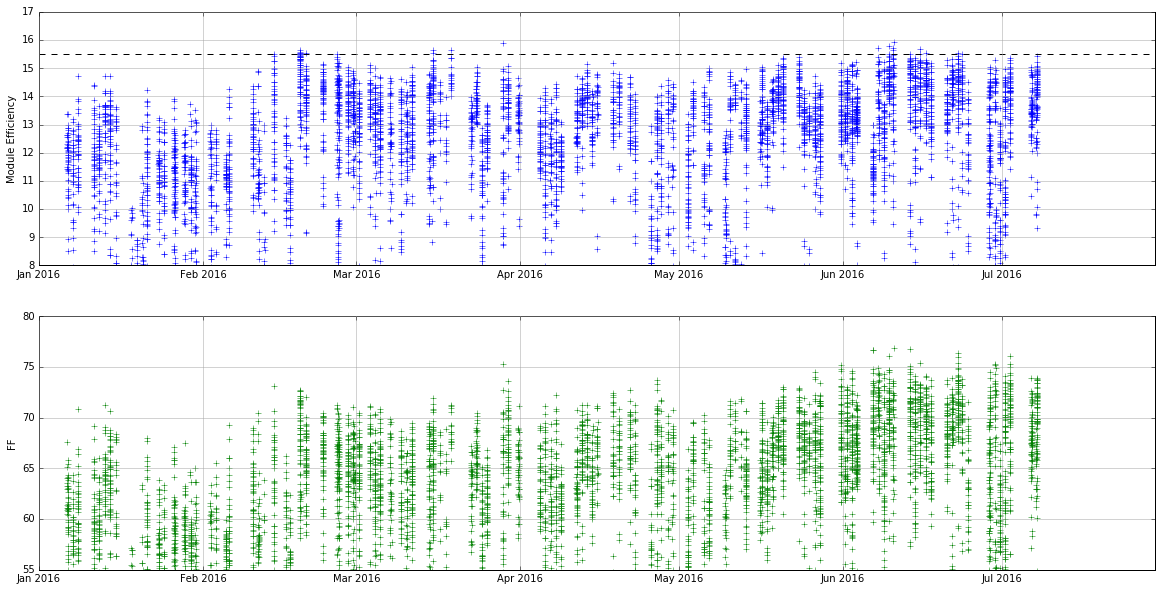

In [24]:
##module eff, FF, Voc, Jsc vs time
plt.figure(2)
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(ivtdfmod['Date_tm'], ivtdfmod['Efficiency']*100, '+')
plt.xlim([datetime.date(2016, 1, 1), datetime.date(2016, 7, 30)])
plt.ylim(8, 17)
#plt.title("6\" progress -- Eff")
#plt.xlabel('date')
plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.ylabel('Module Efficiency')
#plt.show()

plt.subplot(212)
plt.plot(ivtdfmod['Date_tm'], ivtdfmod['FillFactor']*100, 'g+')
plt.xlim([datetime.date(2016, 1, 1), datetime.date(2016,7,30)])
plt.ylim(55, 80)
#plt.title("6\" progress -- FF")
#plt.xlabel('date')
plt.ylabel('FF')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.show()

In [25]:
plt.figure(3)
plt.figure(figsize=(20,15))
plt.subplot(311)
plt.plot(mod_trends['Date_tm'], mod_trends['modJsc'], 'r+')
plt.xlim([datetime.date(2016, 1, 1), datetime.date(2016,7,30)])
plt.ylim(20, 28)
#plt.title("6\" progress -- Jsc")
#plt.xlabel('date')
plt.ylabel('Jsc [mA/cm^2]')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
#plt.show()

plt.subplot(312)
plt.plot(mod_trends['Date_tm'], mod_trends['modVoc'], '+m')
plt.xlim([datetime.date(2016, 1, 1), datetime.date(2016,7,30)])
plt.ylim(0.78, .85)
#plt.title("6\" progress -- Voc")
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.xlabel('date')
plt.ylabel('Voc [V]')
plt.show()

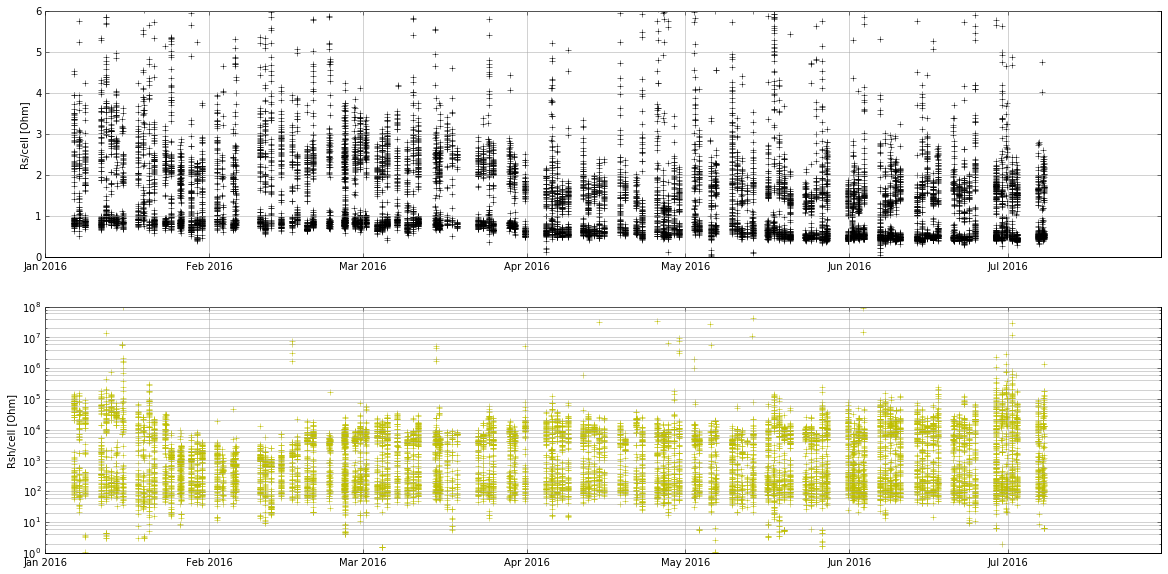

In [26]:
ivtdfmod['Rsh_Ohm'] = ivtdfmod['Rsh_Ohm'].astype(float)

#ivtdfmod['mean_Rsh'] = ivtdfmod['Rsh_Ohm'].mean
#ivtdfmod['mean_Rsh']

plt.figure(3)
plt.figure(figsize=(20,15))
plt.subplot(311)
plt.plot(ivtdfmod['Date_tm'], ivtdfmod['Rs_Ohm']/22, 'k+')
plt.xlim([datetime.date(2016,1, 1), datetime.date(2016,7,30)])
plt.ylim(0, 6)
#plt.title("6\" progress -- Eff")
#plt.xlabel('date')
#plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.ylabel('Rs/cell [Ohm]')
#plt.show()

plt.subplot(312)
plt.plot(ivtdfmod['Date_tm'], ivtdfmod['Rsh_Ohm']/22, 'y+')
plt.xlim([datetime.date(2016,1, 1), datetime.date(2016,7,30)])
plt.ylim(1e0, 1e8)
#plt.title("6\" progress -- Eff")
#plt.xlabel('date')
#plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.ylabel('Rsh/cell [Ohm]')
plt.yscale('log')
plt.show()

### efficiency + FF

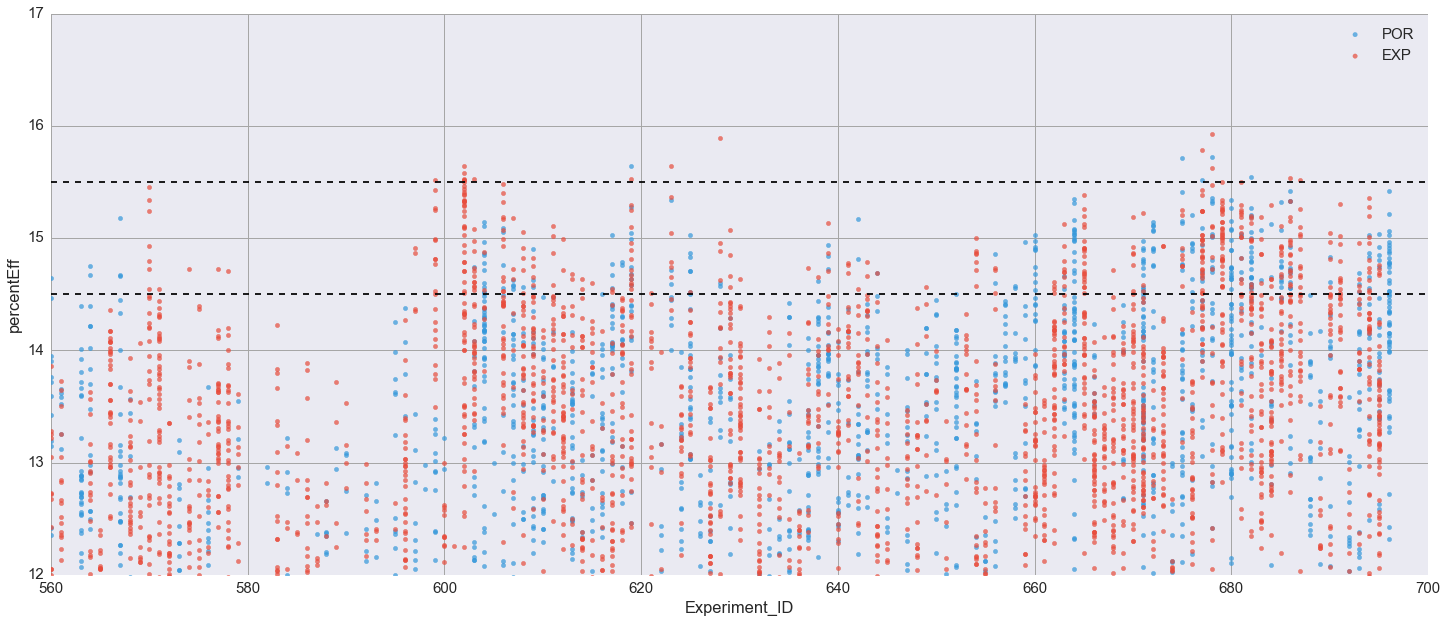

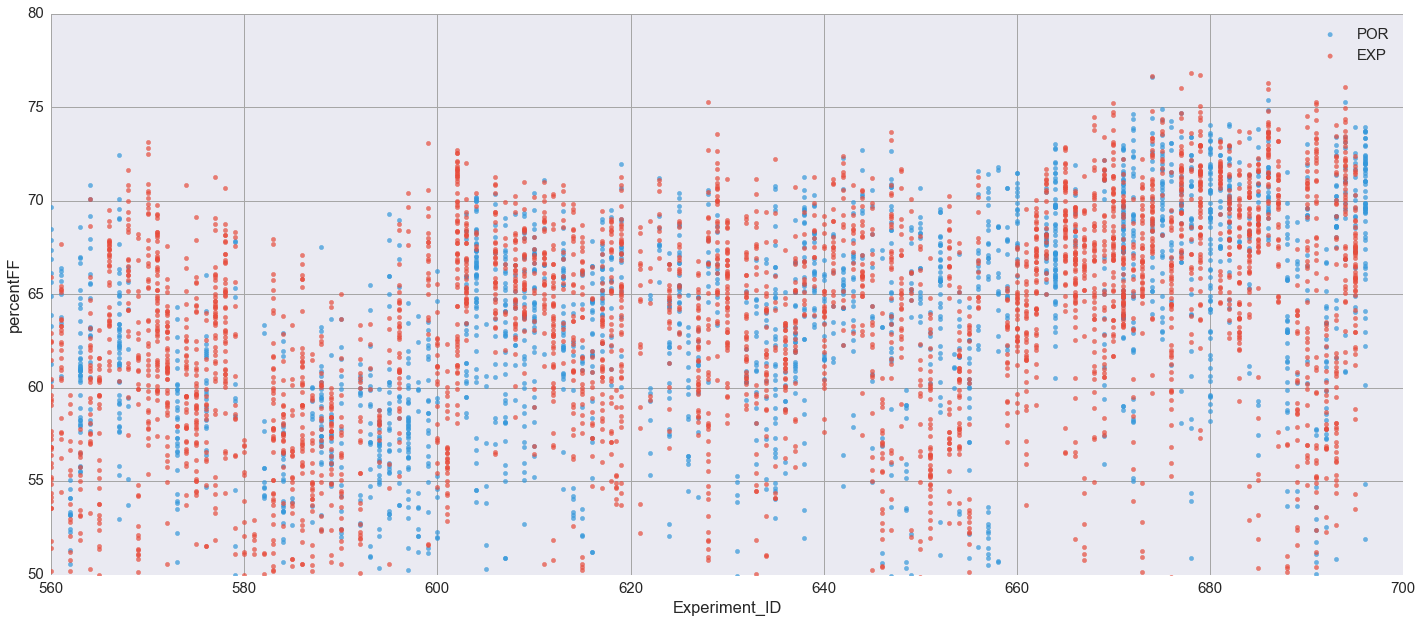

In [27]:
import seaborn as sns
flatui = ["#3498db", "#e74c3c", "#2ecc71", "#95a5a6", "#34495e", "#9b59b6"]
sns.set(style='darkgrid')
sns.set_palette(flatui)
sns.set_context("notebook", font_scale=1.5,)
#fig, ax = plt.subplots(figsize=(15, 15))
# the size of A4 paper
#plt.figure(figsize=(20, 20))

#_cond = ['POR', 'EXP']

#trends['POR'] = trends['POR'].apply(str)

fg = sns.FacetGrid(mod_trends, hue='POR', size= 9, aspect=2.3)#, hue_kws=dict(marker=["^", "v"]))
fg.map(plt.scatter, 'Experiment_ID', 'percentEff', alpha=.7,)
plt.xlim(560,700)
plt.ylim(12, 17)
plt.axhline(15.5, color='k', linestyle='--')
plt.axhline(14.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()

fg1 = sns.FacetGrid(mod_trends, hue='POR', size= 9, aspect=2.3)
fg1.map(plt.scatter, 'Experiment_ID', 'percentFF', alpha=.7)
plt.xlim(560,700)
plt.ylim(50, 80)
#plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()


#g = sns.FacetGrid(tips, col="time",  hue="smoker")
#>>> g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w")
#...       .add_legend())

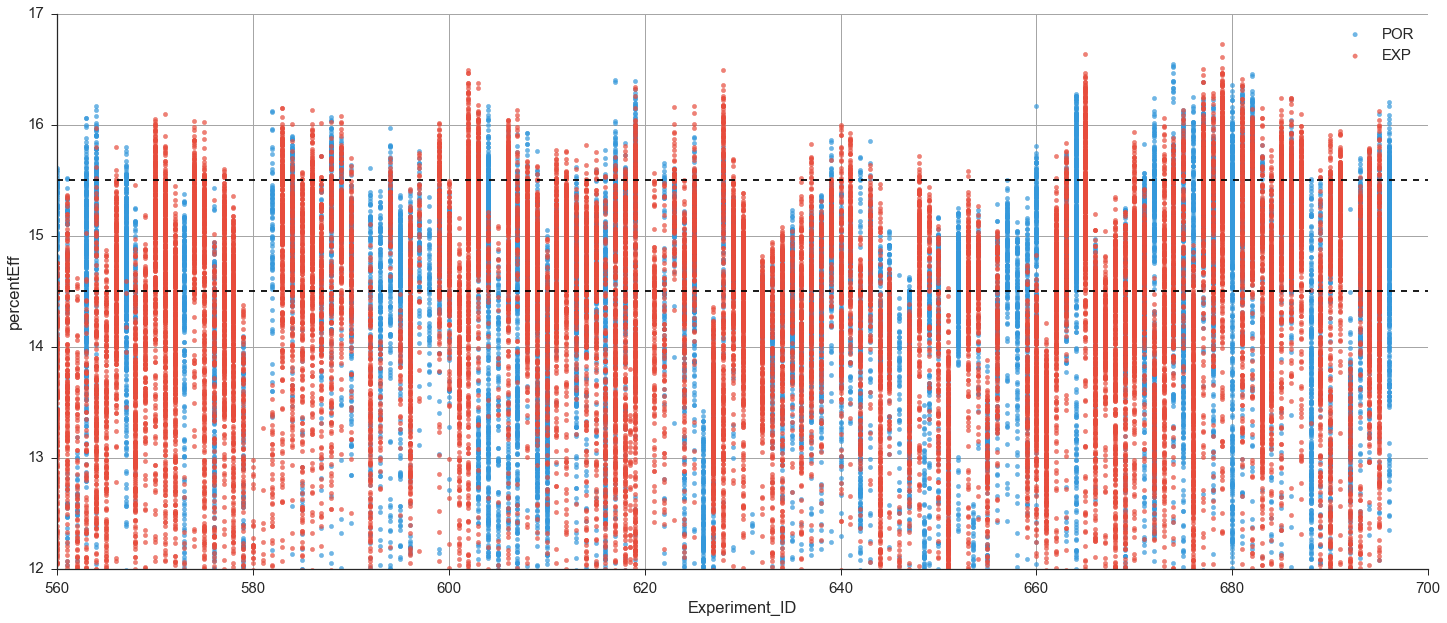

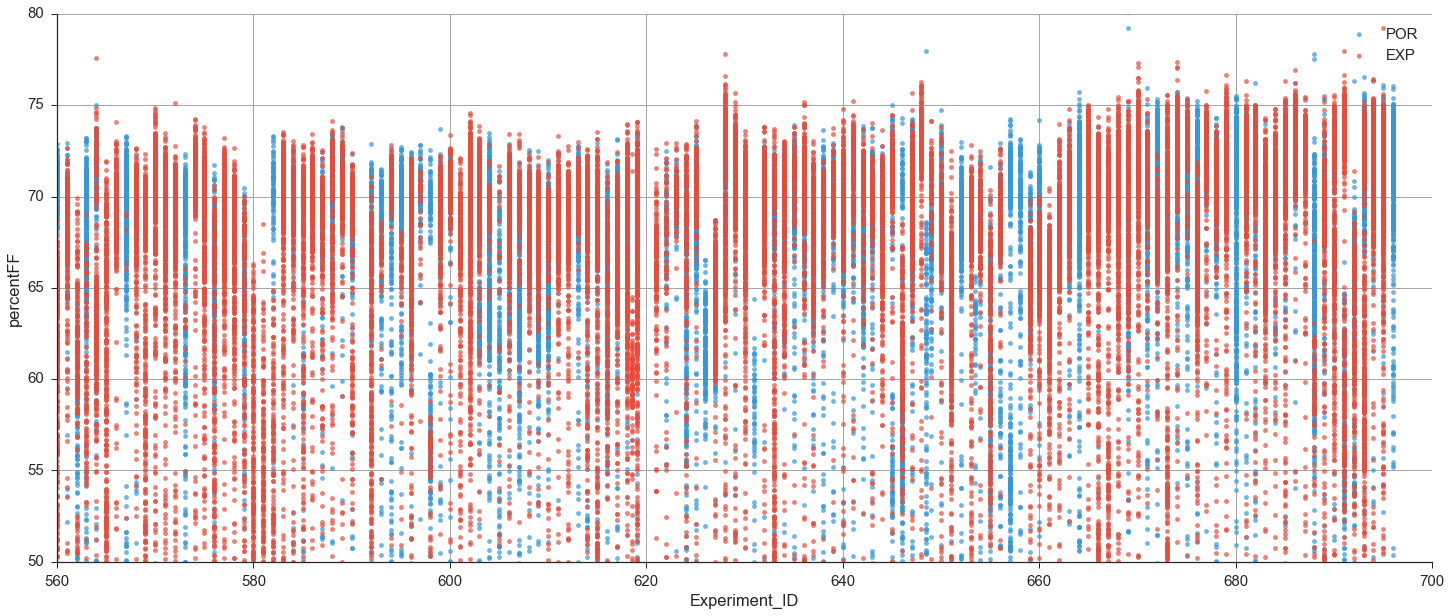

In [28]:
flatui = ["#3498db", "#e74c3c", "#2ecc71", "#95a5a6", "#34495e", "#9b59b6"]
sns.set(style='ticks')
sns.set_palette(flatui)
sns.set_context("notebook", font_scale=1.5,)
#fig, ax = plt.subplots(figsize=(15, 15))
# the size of A4 paper
#plt.figure(figsize=(20, 20))

#_cond = ['POR', 'EXP']

#trends['POR'] = trends['POR'].apply(str)

fg = sns.FacetGrid(cell_trends, hue='POR', size= 9, aspect=2.3)#, hue_kws=dict(marker=["^", "v"]))
fg.map(plt.scatter, 'Experiment_ID', 'percentEff', alpha=.7,)
plt.xlim(560,700)
plt.ylim(12, 17)
plt.axhline(15.5, color='k', linestyle='--')
plt.axhline(14.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()

fg1 = sns.FacetGrid(cell_trends, hue='POR', size= 9, aspect=2.3)
fg1.map(plt.scatter, 'Experiment_ID', 'percentFF', alpha=.7)
plt.xlim(560,700)
plt.ylim(50, 80)
#plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()


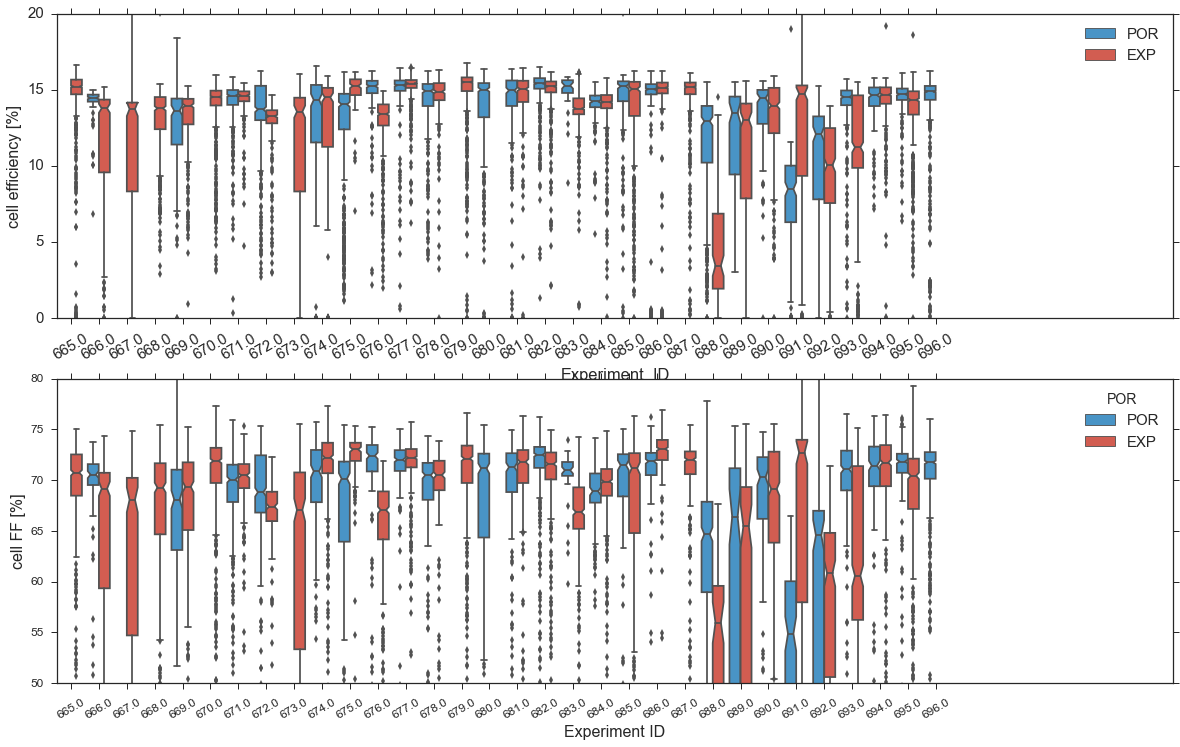

In [62]:
flatui = ["#3498db", "#e74c3c", "#2ecc71", "#95a5a6", "#34495e", "#9b59b6"]
sns.set(style='ticks')
sns.set_palette(flatui)
sns.set_context("notebook", font_scale=1.5,)
#fig, ax = plt.subplots(figsize=(15, 15))
# the size of A4 paper

# create our boxplot which is drawn on an Axes object
plt.figure(2, figsize=(20,12))
plt.subplot(211)
bplot = sns.boxplot('Experiment_ID', 'percentEff', hue='POR', data=cell_trends, notch=True)

# We can call all the methods avaiable to Axes objects
#bplot.set_title(title, fontsize=20)
#bplot.set_xlabel('Experiment ID', fontsize=16)
bplot.set_ylabel('cell efficiency [%]', fontsize=16)
bplot.tick_params(axis='y', labelsize=12, which='minor')
bplot.set_ylim(0,20)
bplot.set_xlim(400.5,440.5)
plt.xticks(rotation=30)
plt.legend()

plt.subplot(212)
bplot2 = sns.boxplot('Experiment_ID', 'percentFF', data=cell_trends, hue='POR', notch=True)
bplot2.set_xlabel('Experiment ID', fontsize=16)
bplot2.set_ylabel('cell FF [%]', fontsize=16)
bplot2.tick_params(axis='both', labelsize=12)
bplot2.set_ylim(50,80)
bplot2.set_xlim(400.5,440.5)

#sns.despine(left=True) 
plt.xticks(rotation=30)
#plt.legend()
plt.show()

### Voc + Jsc

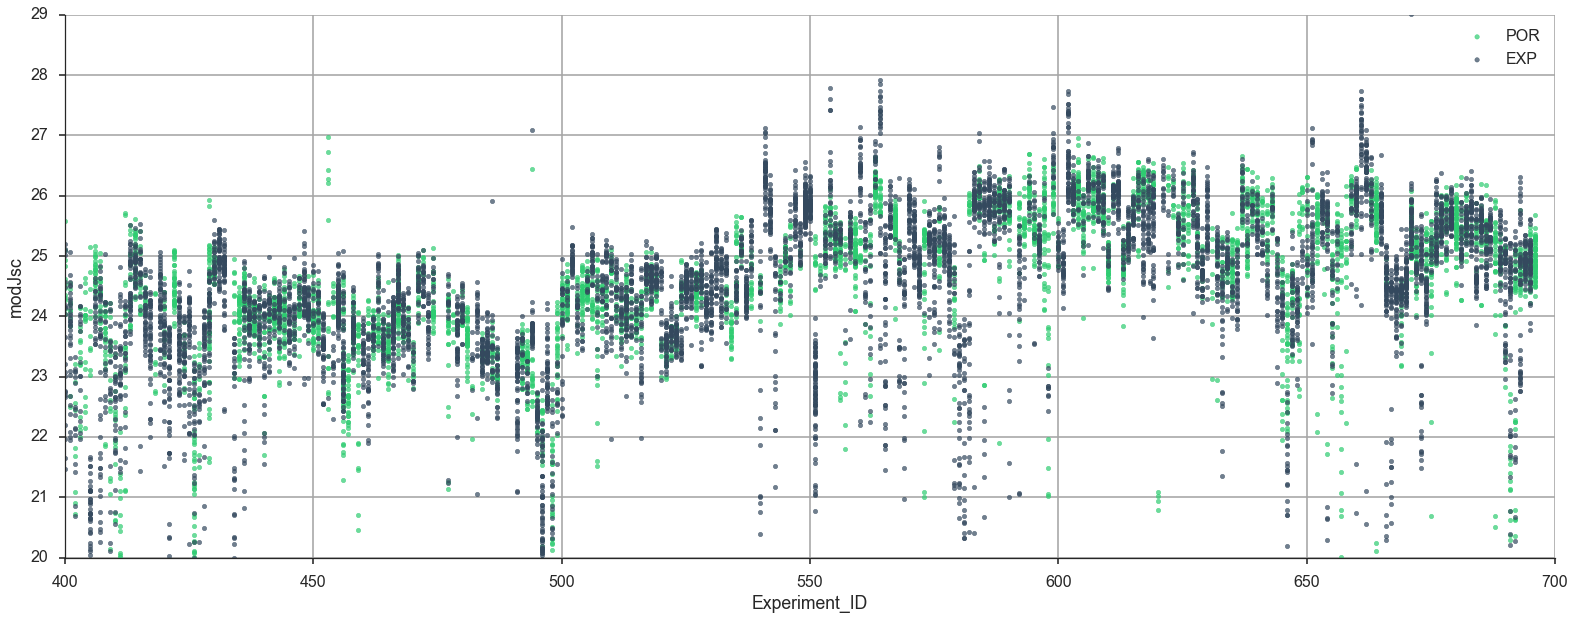

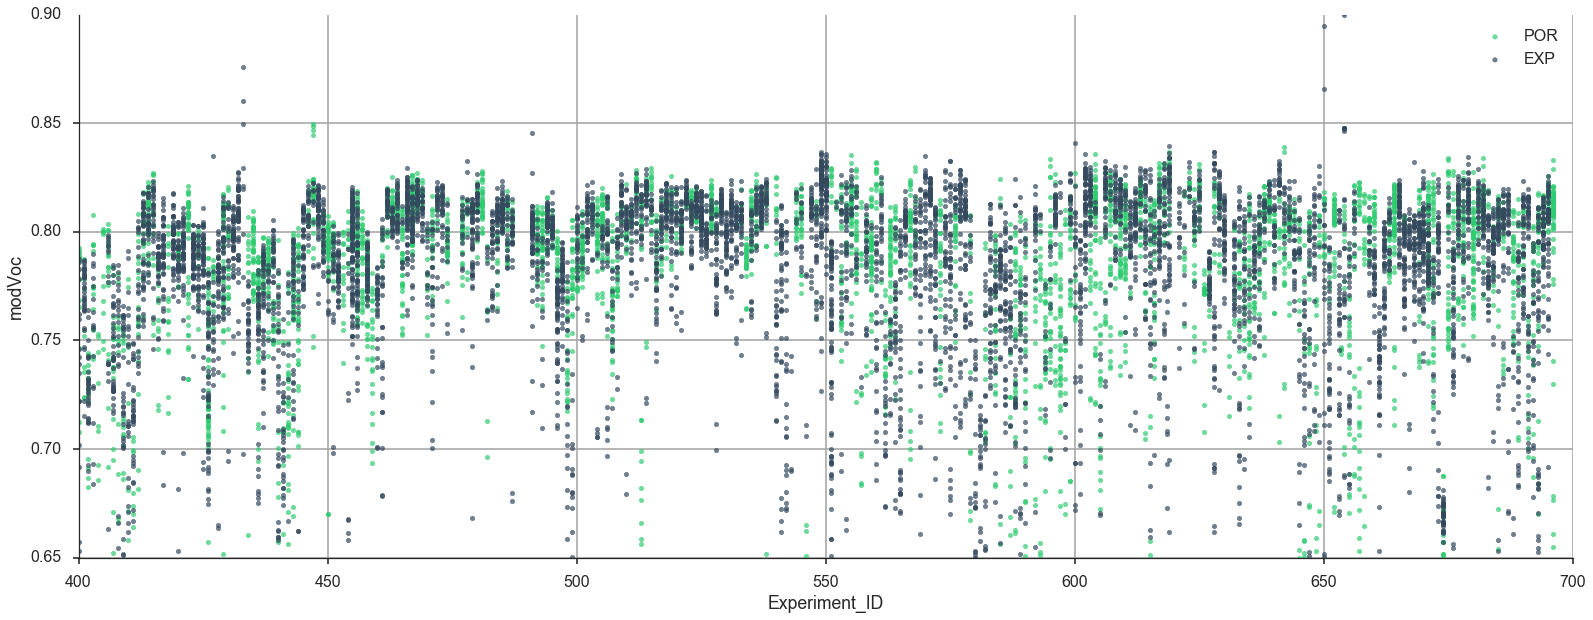

In [30]:
sns.set(style='ticks')
sns.set_context("poster")
flatui1 = ["#2ecc71", "#34495e", "#95a5a6", "#9b59b6", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)
#fig, ax = plt.subplots(figsize=(15, 15))
# the size of A4 paper
#plt.figure(figsize=(20, 20))

fg = sns.FacetGrid(mod_trends, hue='POR', size=9, aspect=2.5)
fg.map(plt.scatter, 'Experiment_ID', 'modJsc', alpha=.7,)
plt.xlim(400,700)
#plt.xlim([datetime.date(2015, 12, 5), datetime.date(2016, 4, 25)])
plt.ylim(20, 29)
plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()


fg1 = sns.FacetGrid(mod_trends, hue='POR', size= 9, aspect=2.5)
fg1.map(plt.scatter, 'Experiment_ID', 'modVoc', alpha=.7, )
plt.xlim(400,700)
#plt.xlim([datetime.date(2015, 12, 5), datetime.date(2016, 4, 25)])
plt.ylim(.65, .9)
#plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()


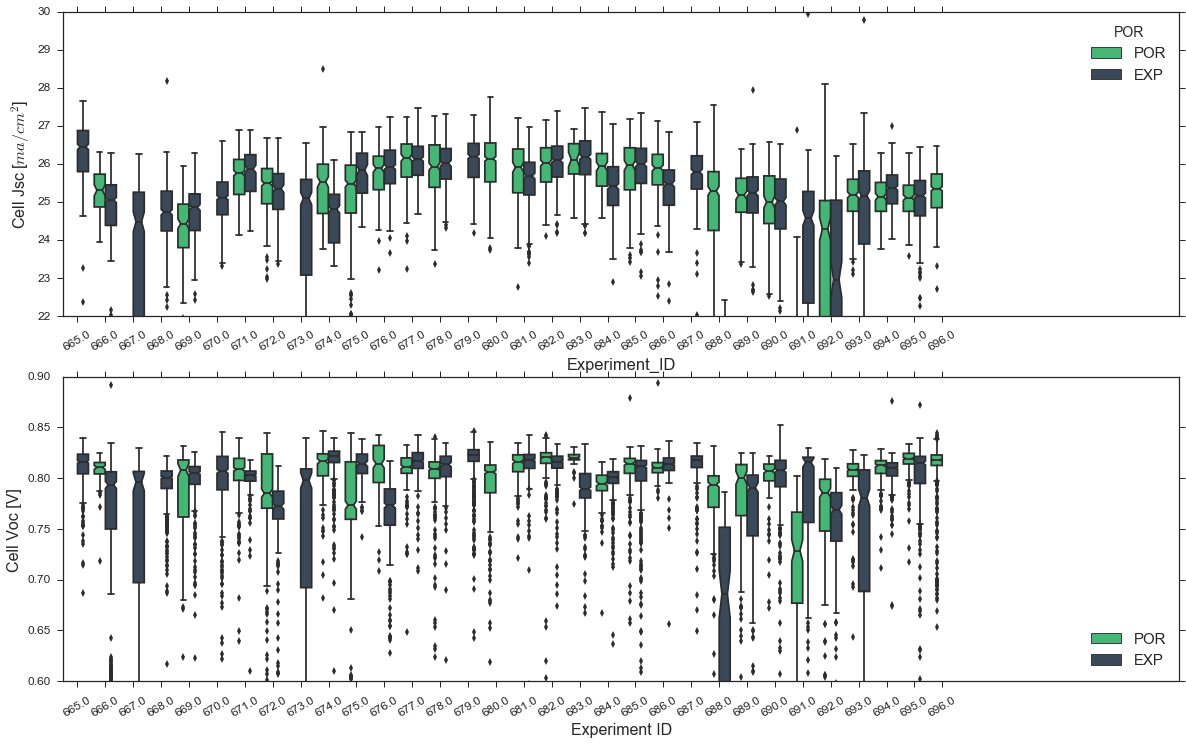

In [61]:
sns.set(style='ticks')
flatui1 = ["#2ecc71", "#34495e", "#95a5a6", "#9b59b6", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)
sns.set_context("notebook", font_scale=1.5,)

# create our boxplot which is drawn on an Axes object
plt.figure(2, figsize=(20,12))
plt.subplot(211)
bplot = sns.boxplot('Experiment_ID', 'cellJsc', hue='POR', data=cell_trends, notch=True)

# We can call all the methods avaiable to Axes objects
#bplot.set_title(title, fontsize=20)
#bplot.set_xlabel('Experiment ID', fontsize=16)
bplot.set_ylabel('Cell Jsc [$ma/cm^2$]', fontsize=16)
bplot.tick_params(axis='both', labelsize=12)
bplot.set_ylim(22,30)
bplot.set_xlim(400.5,440.5)
plt.xticks(rotation=30)
#bplot.legend()

plt.subplot(212)
bplot2 = sns.boxplot('Experiment_ID', 'cellVoc', data=cell_trends, hue='POR', notch=True)
bplot2.set_xlabel('Experiment ID', fontsize=16)
bplot2.set_ylabel('Cell Voc [V]', fontsize=16)
bplot2.tick_params(axis='both', labelsize=12)
bplot2.set_ylim(0.6,0.9)
bplot2.set_xlim(400.5,440.5)


#sns.despine(left=True) 
plt.xticks(rotation=30)
plt.legend(loc='lower right')
plt.show()

### Rs + Rsh

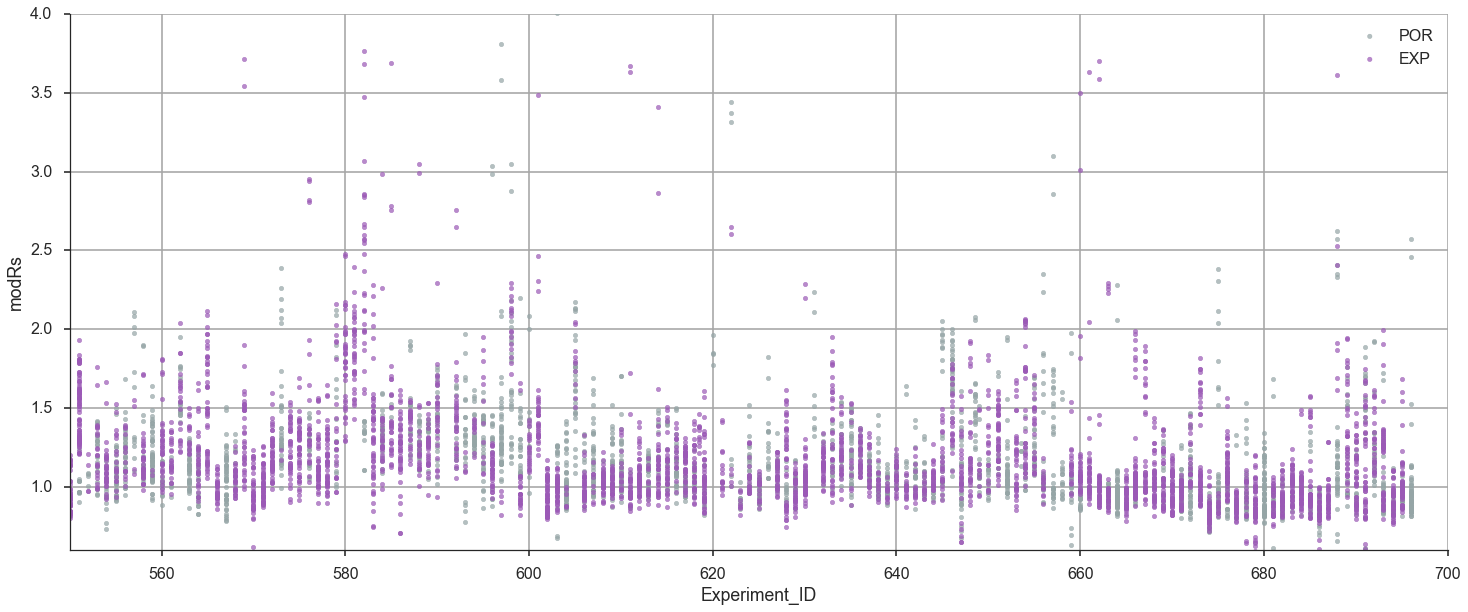

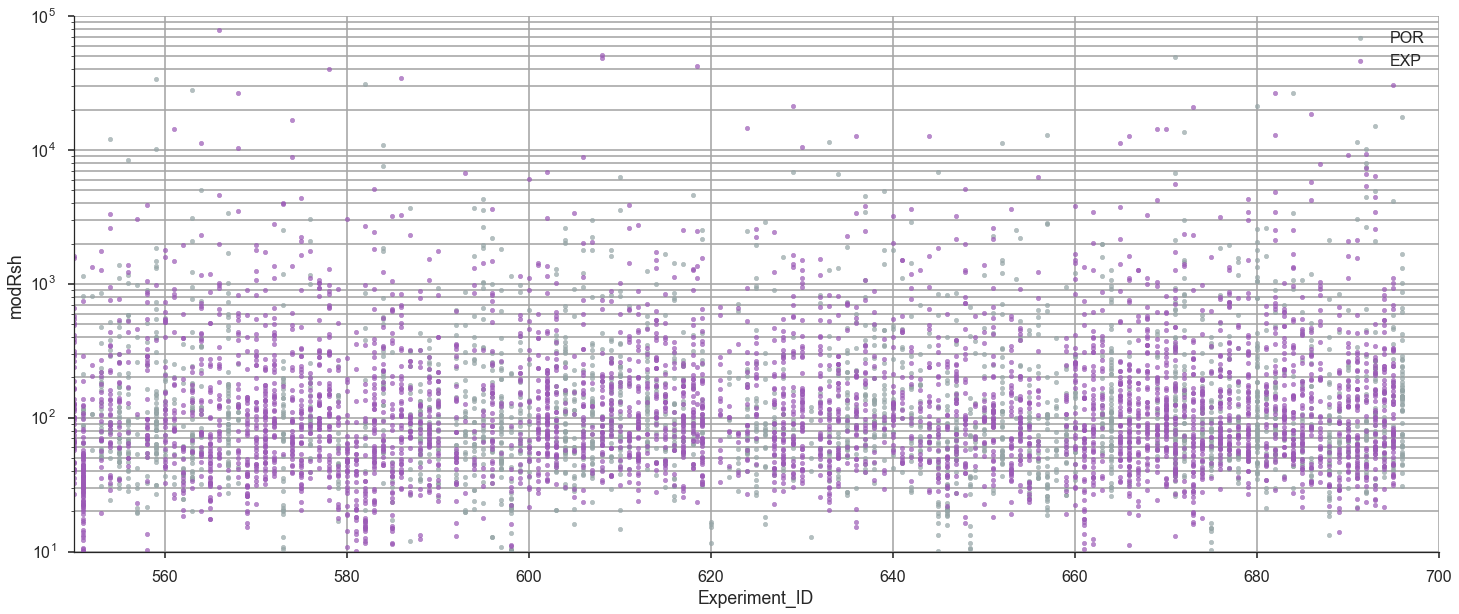

In [32]:
#using extrapolated Rs+Rsh (Roc/Rsc) from LIV curves -- dark R can be found in Rs/Rsh but need to filter for dark

sns.set(style='ticks')
sns.set_context("poster")
flatui2 = ["#95a5a6", "#9b59b6","#2ecc71", "#34495e", "#3498db", "#e74c3c",]
sns.set_palette(flatui2)
#fig, ax = plt.subplots(figsize=(15, 15))
# the size of A4 paper
#plt.figure(figsize=(20, 20))

fg = sns.FacetGrid(mod_trends, hue='POR', size= 9, aspect=2.3)
fg.map(plt.scatter, 'Experiment_ID', 'modRs', alpha=.7,)
plt.xlim(550,700)
plt.ylim(.6, 4)
plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()


fg1 = sns.FacetGrid(mod_trends, hue='POR', size= 9, aspect=2.3)
fg1.map(plt.scatter, 'Experiment_ID', 'modRsh', alpha=.7,)
plt.xlim(550,700)
plt.ylim(1e1, 1e5)
plt.yscale('log')
#plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()

plt.savefig('shuntsbrah.png')

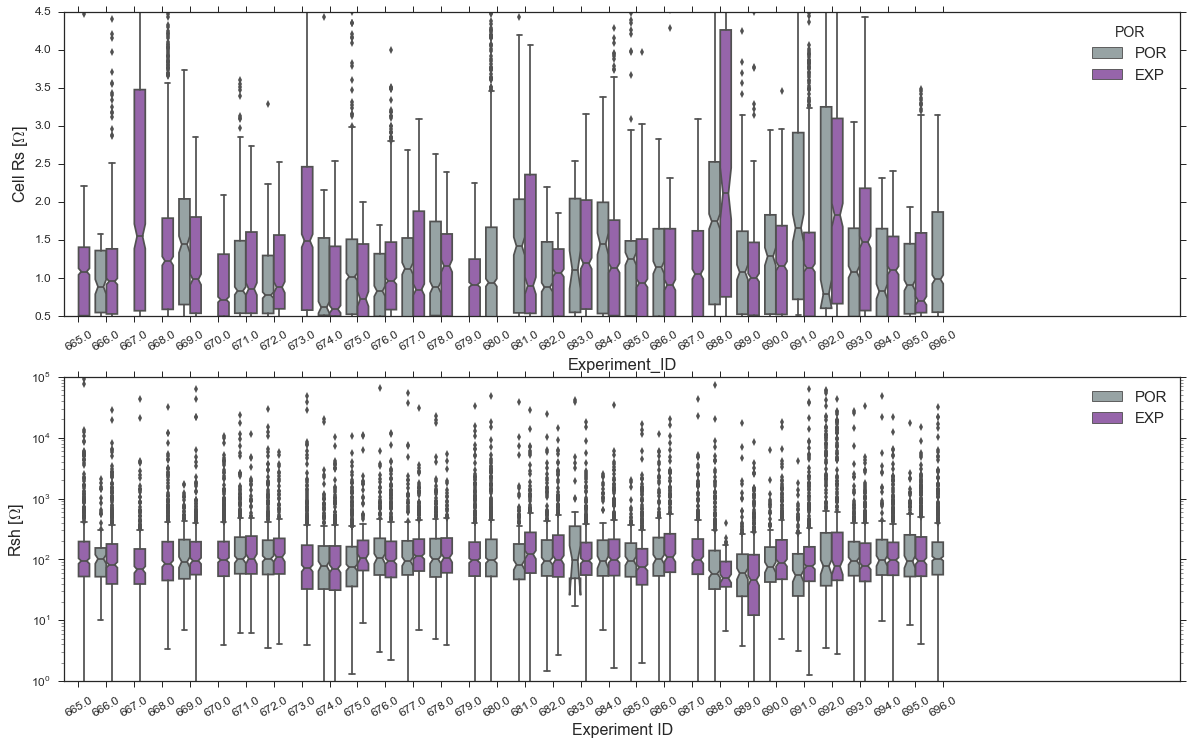

In [63]:
sns.set(style='ticks')
flatui2 = ["#95a5a6", "#9b59b6","#2ecc71", "#34495e", "#3498db", "#e74c3c",]
sns.set_palette(flatui2)
sns.set_context("notebook", font_scale=1.5,)
plt.rc('text', usetex=False)

# create our boxplot which is drawn on an Axes object
plt.figure(2, figsize=(20,12))
plt.subplot(211)
bplot = sns.boxplot('Experiment_ID', 'cellRs', hue='POR', data=cell_trends, notch=True)

# We can call all the methods avaiable to Axes objects
#bplot.set_title(title, fontsize=20)
#bplot.set_xlabel('Experiment ID', fontsize=16)
bplot.set_ylabel(r'Cell Rs [$\Omega$]', fontsize=16)
bplot.tick_params(axis='both', labelsize=12)
bplot.set_ylim(0.5,4.5)
bplot.set_xlim(400.5,440.5)
plt.xticks(rotation=30)
#plt.legend()

plt.subplot(212)
bplot2 = sns.boxplot('Experiment_ID', 'cellRsh', data=cell_trends, hue='POR', notch=True)
bplot2.set_xlabel('Experiment ID', fontsize=16)
bplot2.set_ylabel(r'Rsh [$\Omega$]', fontsize=16)
bplot2.tick_params(axis='both', labelsize=12)
bplot2.set_ylim(1,1e5)
bplot2.set_xlim(400.5,440.5)
plt.yscale('log')

#sns.despine(left=True) 
plt.xticks(rotation=30)
plt.legend()
plt.show()

In [34]:
sns.set_context("notebook", font_scale=1.5,)
plt.figure(figsize=(20,12))
#plt.subplot(211)
#bplot = sns.boxplot('Experiment_ID', 'cellRs_norm', hue='POR', data=cell_trends, notch=True)
#bplot.set_ylabel(r'Cell Rs [$\Omega$]', fontsize=16)
#bplot.tick_params(axis='both', labelsize=12)
#bplot.set_ylim(-1.5,15.5)
#bplot.set_xlim(350.5,390.5)
#plt.xticks(rotation=30)

fg = sns.FacetGrid(cell_trends, hue='POR', size= 9, aspect=2.3)
fg.map(plt.scatter, 'Experiment_ID', 'cellRs_norm', alpha=.7,)
plt.xlim(560,700)
plt.ylim(0, 20)
plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()

fg1 = sns.FacetGrid(cell_trends, hue='POR', size= 9, aspect=2.3)
fg1.map(plt.scatter, 'Experiment_ID', 'cellRsh_norm', alpha=.7,)
plt.xlim(560,700)
plt.ylim(1e0, 1e8)
plt.yscale('log')
plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

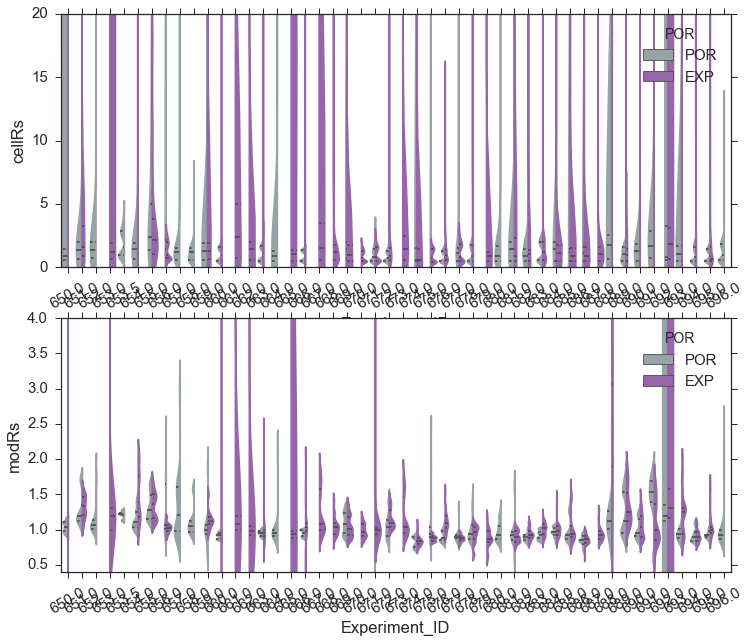

In [35]:
celltrendslatest = cell_trends[(cell_trends['Experiment_ID'] >= 650) & (cell_trends['Experiment_ID'] < 700)]
modtrendslatest = mod_trends[(mod_trends['Experiment_ID'] >= 650) & (mod_trends['Experiment_ID'] < 700)]


sns.set(style='ticks')
flatui2 = ["#95a5a6", "#9b59b6","#2ecc71", "#34495e", "#3498db", "#e74c3c",]
sns.set_palette(flatui2)
sns.set_context("notebook", font_scale=1.5,)

plt.figure(2, figsize=(12,10))
plt.subplot(211)
#v = sns.violinplot(x='Experiment_ID', y='cellRs', hue='POR', data=celltrendslatest, split=True, inner="quartile", bw=.5).set_ylim(-1, 10)
v = sns.violinplot(x='Experiment_ID', y='cellRs', hue='POR', data=celltrendslatest, split=True, inner="quartile", bw=.3).set_ylim(0, 20)
plt.xticks(rotation=30)

plt.subplot(212)
v2 = sns.violinplot(x='Experiment_ID', y='modRs', hue='POR', data=modtrendslatest, split=True, inner="quartile", bw=.3).set_ylim(0.4, 4)

plt.xticks(rotation=30)

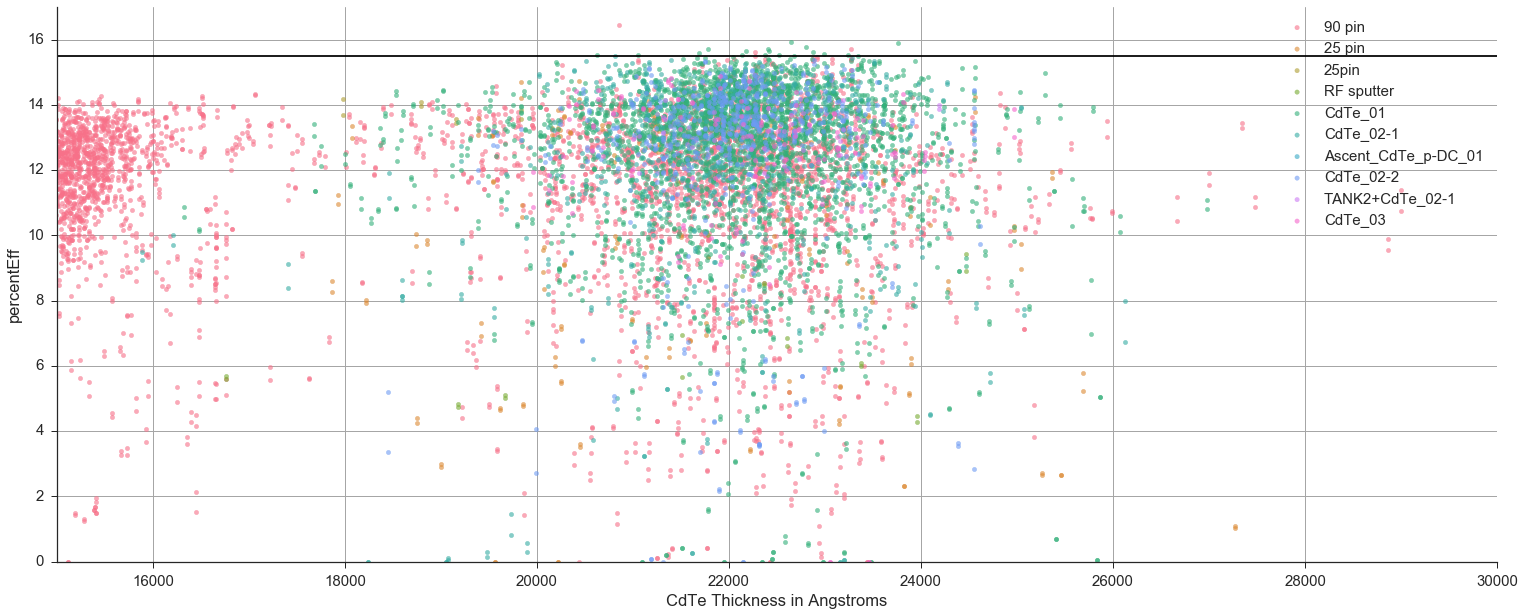

In [36]:
#cds thickness vs efficiency
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.5,)

fg = sns.FacetGrid(cds, hue='Target Material', size= 9, aspect=2.4) #col='CdS Tool'
fg.map(plt.scatter, 'CdS Thickness (nm)', 'percentEff', alpha=.6,)
#plt.xlim(550,650)
plt.ylim(0, 17)
plt.axhline(15.5, color='k', linestyle='-')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()

fg1 = sns.FacetGrid(cds, size= 9, aspect=2.4, hue='CdTe Tool') #col='CdS Tool'
fg1.map(plt.scatter, 'CdTe Thickness in Angstroms', 'percentEff', alpha=.6,)
plt.xlim(15000,30000)
plt.ylim(0, 17)
plt.axhline(15.5, color='k', linestyle='-')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()

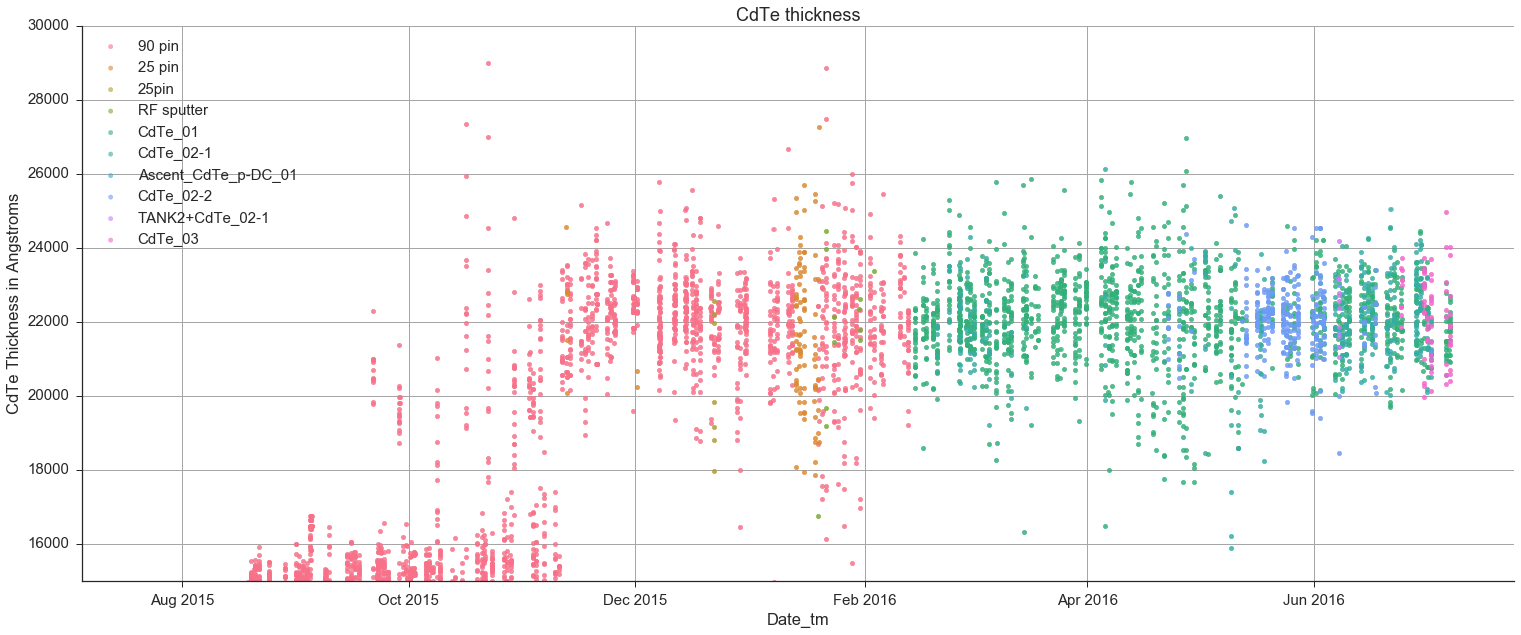

In [37]:
colorb=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.5,)
fg = sns.FacetGrid(cds, hue='Target Material', size= 9, aspect=2.4) #col='CdS Tool'
fg.map(plt.scatter, 'Date_tm', 'CdS Thickness (nm)', alpha=.6,)
#plt.xlim(550,650)
plt.xlim([datetime.date(2015, 7, 5), datetime.date(2016, 7, 25)])
plt.ylim(20, 100)
#plt.axhline(15.5, color='k', linestyle='-')
plt.title("CdS thickness")
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend(loc="lower right")

fg1 = sns.FacetGrid(cds, hue='CdTe Tool', size= 9, aspect=2.4) #col='CdS Tool'
fg1.map(plt.scatter, 'Date_tm', 'CdTe Thickness in Angstroms', alpha=.6,)
#plt.xlim(550,650)
plt.xlim([datetime.date(2015, 7, 5), datetime.date(2016, 7, 25)])
plt.ylim(15000, 30000)
plt.title("CdTe thickness")
#plt.axhline(15.5, color='k', linestyle='-')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend(loc="upper left")

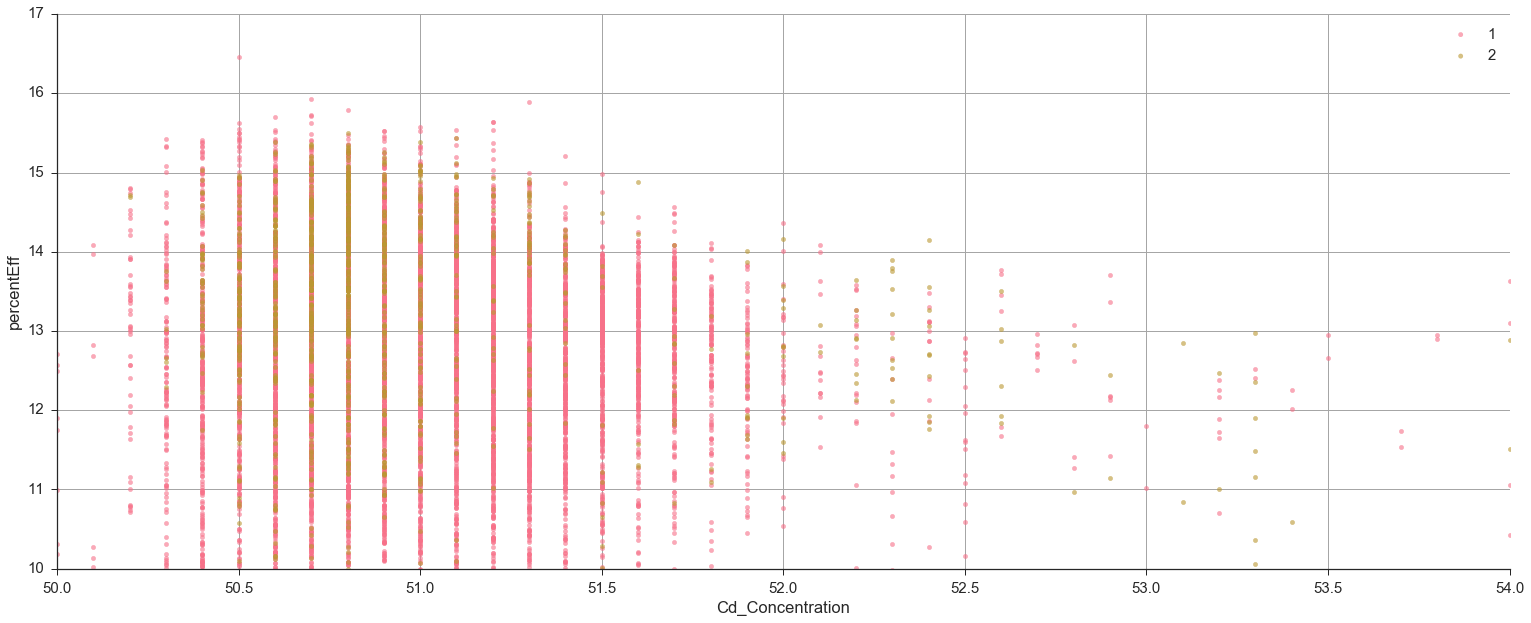

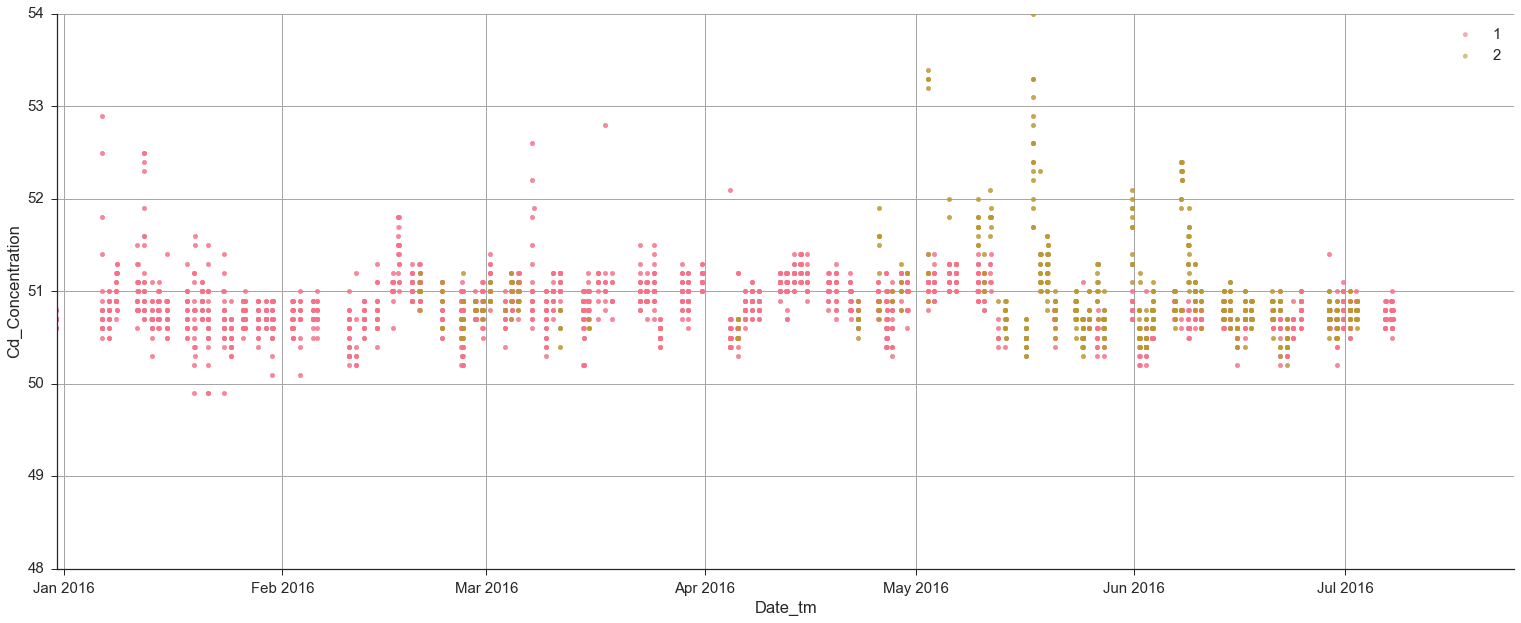

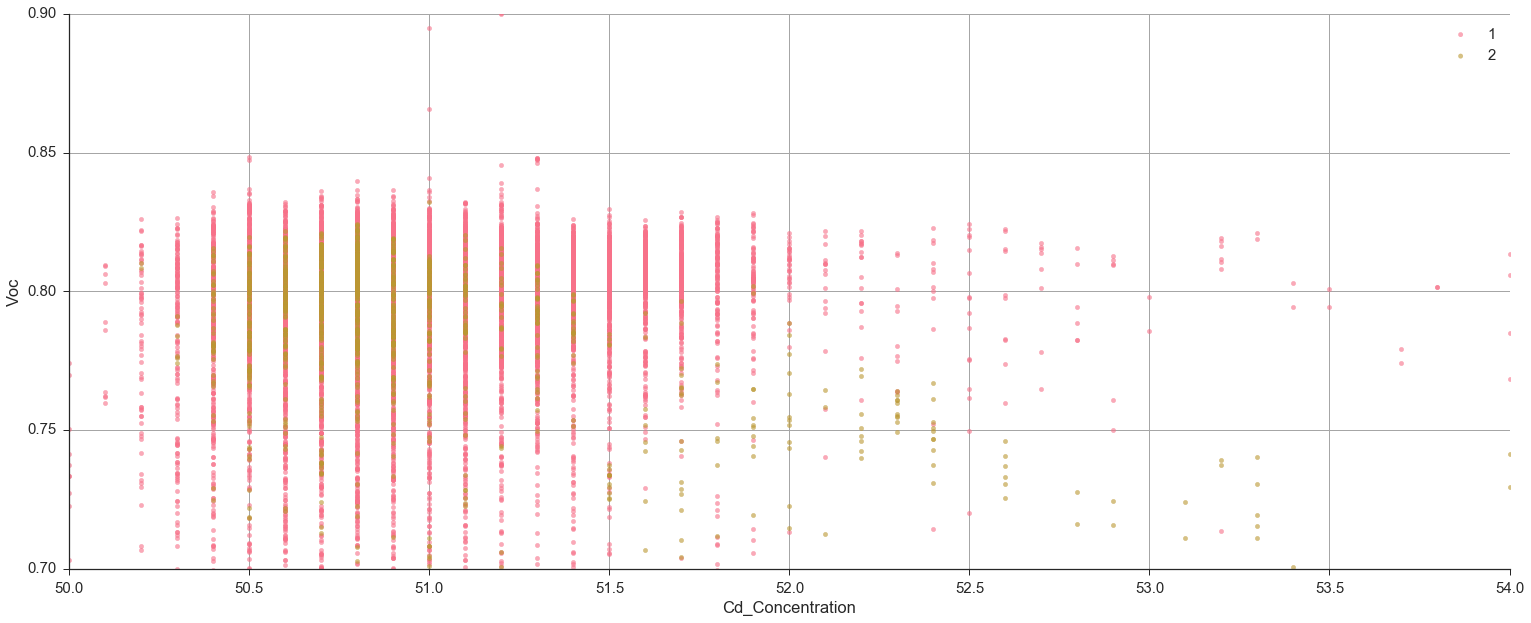

In [38]:
fg1 = sns.FacetGrid(cds, size= 9, aspect=2.4, hue='CdTe_Tool') #col='CdS Tool'
fg1.map(plt.scatter,'Cd_Concentration','percentEff', alpha=.6,)
plt.xlim(50,54)
plt.ylim(10, 17)
#plt.axhline(15.5, color='k', linestyle='-')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()

fg = sns.FacetGrid(cds, size= 9, aspect=2.4, hue='CdTe_Tool') #col='CdS Tool'
fg.map(plt.scatter,'Date_tm','Cd_Concentration', alpha=.6,)
#plt.xlim(50,54)
plt.xlim([datetime.date(2015, 12, 31), datetime.date(2016, 7, 25)])
plt.ylim(48, 54)
#plt.axhline(15.5, color='k', linestyle='-')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()

fg2 = sns.FacetGrid(cds, size= 9, aspect=2.4, hue='CdTe_Tool') #col='CdS Tool'
fg2.map(plt.scatter,'Date_tm','Te_Concentration', alpha=.6,)
#plt.xlim(50,54)
plt.xlim([datetime.date(2015, 12, 31), datetime.date(2016, 7, 25)])
plt.ylim(46, 50)
#plt.axhline(15.5, color='k', linestyle='-')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()

fg4 = sns.FacetGrid(cds, size= 9, aspect=2.4, hue='CdTe_Tool') #col='CdS Tool'
fg4.map(plt.scatter,'Cd_Concentration','Voc', alpha=.6,)
plt.xlim(50,54)
plt.ylim(0.7, 0.9)
#plt.axhline(15.5, color='k', linestyle='-')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()

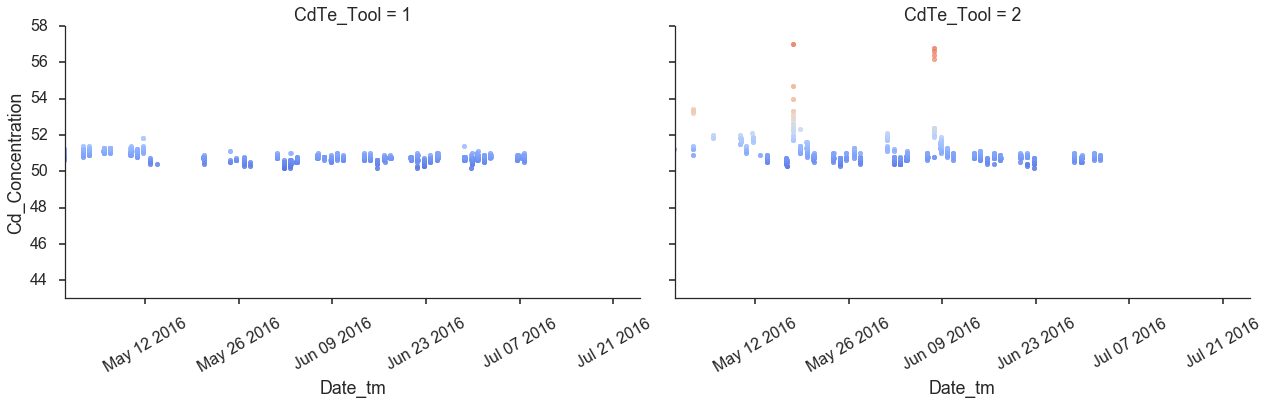

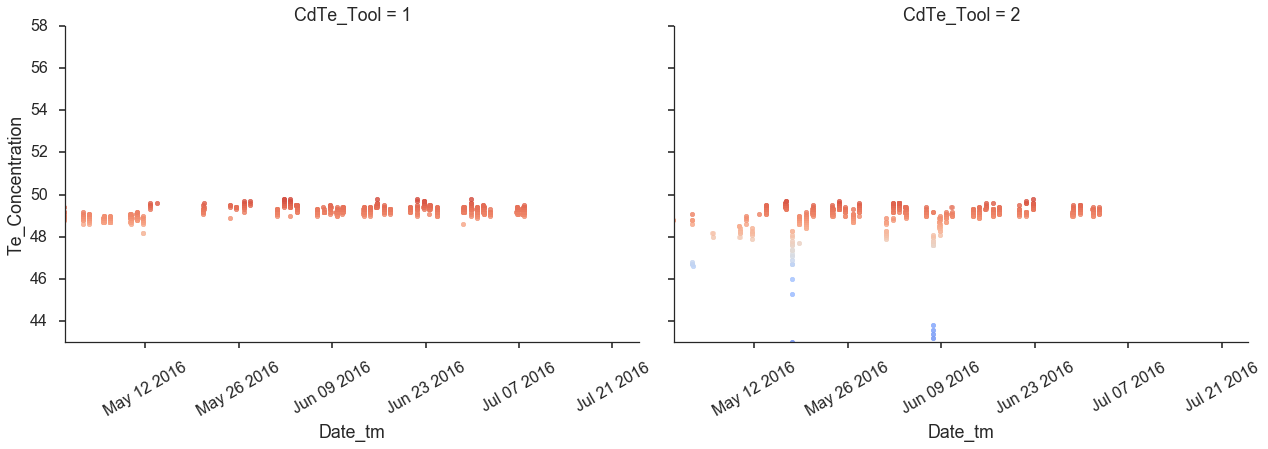

In [39]:
sns.color_palette("Paired")
sns.set_context("poster")


fg = sns.FacetGrid(cds, size= 6, aspect=1.5, col='CdTe_Tool', margin_titles=True, xlim=([datetime.date(2016, 4, 30), datetime.date(2016, 7, 25)]), ylim=(43, 58),hue='Cd_Concentration', palette = "coolwarm", legend_out=True) #col='CdS Tool'
plt.xticks(rotation=30)
fg.map(plt.scatter,'Date_tm', 'Cd_Concentration', alpha=.6,)
#plt.title("Cd Conc")
fg.set_xticklabels(rotation=30)
fg2 = sns.FacetGrid(cds, size= 6, aspect=1.5, margin_titles=True, xlim=([datetime.date(2016, 4, 30), datetime.date(2016, 7, 25)]), ylim=(43, 58),col='CdTe_Tool', hue='Te_Concentration', palette = "coolwarm", legend_out=True) #col='CdS Tool'
fg2.map(plt.scatter,'Date_tm', 'Te_Concentration', alpha=.6,)
#plt.title("Te Conc")
fg2.set_xticklabels(rotation=30)

In [40]:
cds.plot(kind='scatter', x='percentEff', y='Cd_Concentration');
plt.xlim(14,16.5)
plt.ylim(50,52)

(50, 52)

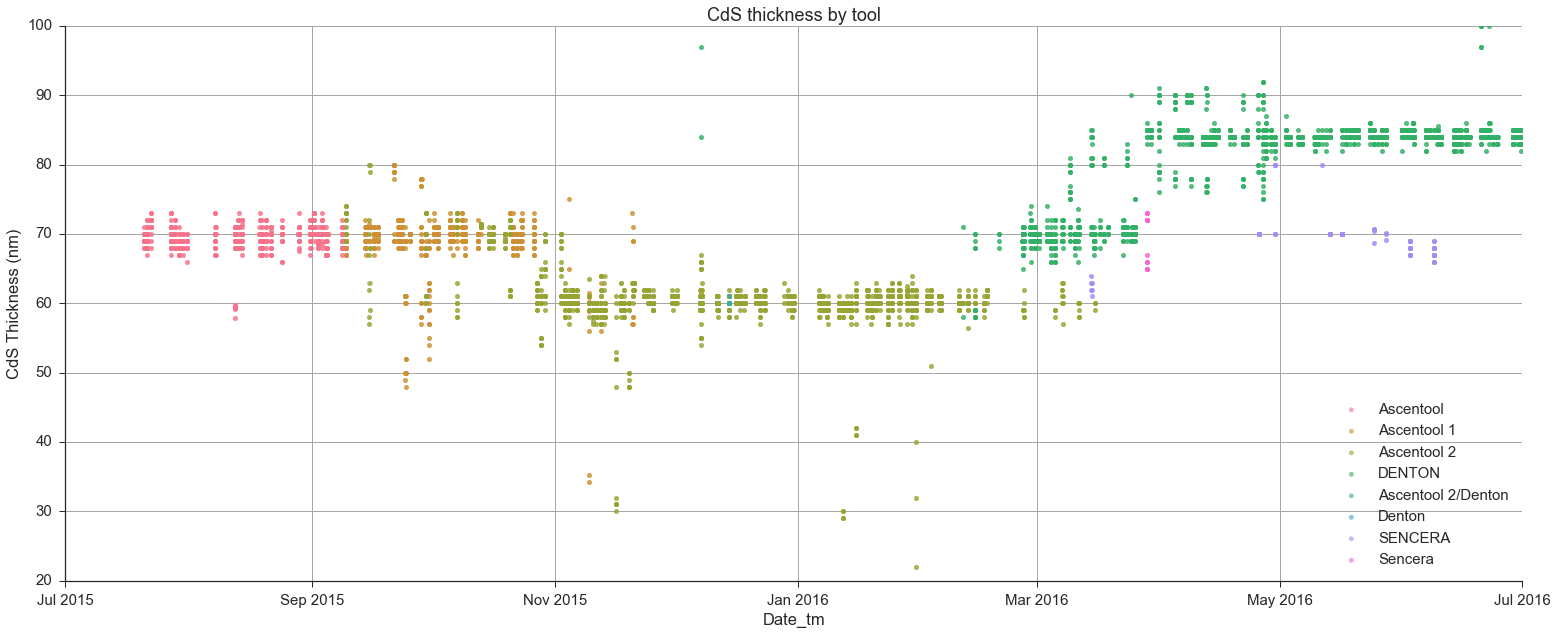

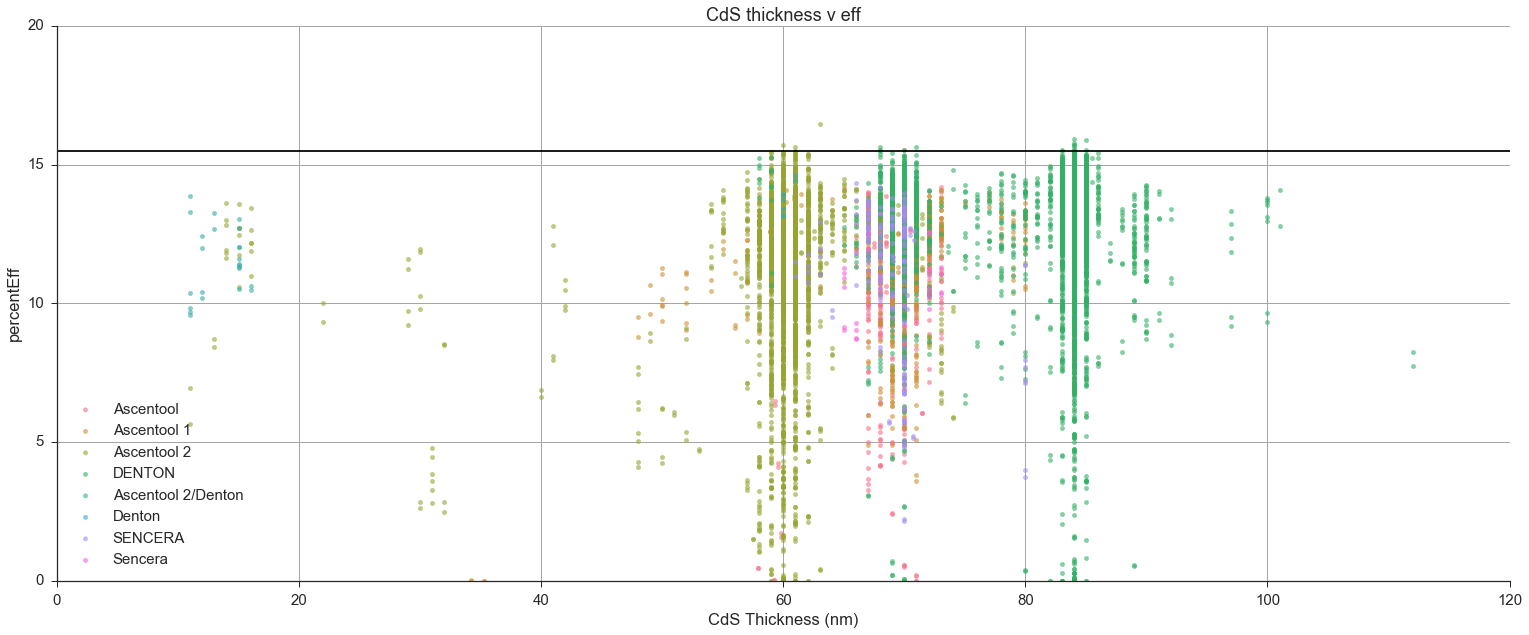

In [41]:
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.5,)
fg = sns.FacetGrid(cds, hue='CdS Tool', size= 9, aspect=2.4)#, col='CdS Tool')
fg.map(plt.scatter, 'Date_tm', 'CdS Thickness (nm)', alpha=.6,)
#plt.xlim(550,650)
plt.xlim([datetime.date(2015, 7, 1), datetime.date(2016, 7, 1)])
plt.ylim(20, 100)
#plt.axhline(15.5, color='k', linestyle='-')
plt.title("CdS thickness by tool")
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend(loc="lower right")

fg1 = sns.FacetGrid(cds, hue='CdS Tool', size= 9, aspect=2.4)#, col='CdS Tool')
fg1.map(plt.scatter, 'CdS Thickness (nm)', 'percentEff',alpha=.6,)
plt.xlim(0,120)
#plt.xlim([datetime.date(2015, 7, 1), datetime.date(2016, 7, 1)])
plt.ylim(0, 20)
plt.axhline(15.5, color='k', linestyle='-')
plt.title("CdS thickness v eff")
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend(loc="best")

# stats -- cell & module

In [42]:
trends.describe()

#trends.sort_values(by='Date_tm')
#trends.iloc[:,[1,2,5,22,23,37, 38, 39]]

c:\anaconda3\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning:

Invalid value encountered in percentile



Experiment_ID  CdS Thickness (nm)  CdTe Thickness in Angstroms  \
count  237439.000000       234971.000000                228214.000000   
mean      588.263171           71.154311                 20541.629273   
std        66.841802           11.047261                  4331.330293   
min       467.000000           11.000000                     1.000000   
25%              NaN                 NaN                          NaN   
50%              NaN                 NaN                          NaN   
75%              NaN                 NaN                          NaN   
max       696.000000          170.000000                224018.000000   

       CdTe Anneal Tool  ZnTe Comment  Cell_Area_mm2     Cell_Count  \
count     234171.000000           0.0  241901.000000  241901.000000   
mean           1.896524           NaN     288.670623       2.772403   
std            0.787743           NaN     279.745723       5.833272   
min            1.000000           NaN       0.000000       0.000000   
25%                 NaN           NaN       5.650000       1.000000   
50%                 NaN           NaN     565.000000       1.000000   
75%                 NaN           NaN     565.000000       1.000000   
max            3.000000           NaN     575.000000      23.000000   

             Cell_no  Eff     Efficiency   FF     FillFactor         Isc_mA  \
count  241901.000000  0.0  122360.000000  0.0  121892.000000  122361.000000   
mean       11.613416  NaN       0.122770  NaN       0.757372     138.270771   
std         6.735157  NaN       0.038782  NaN      43.496687      18.510932   
min         1.000000  NaN       0.000000  NaN       0.000000       0.000000   
25%         5.000000  NaN            NaN  NaN            NaN            NaN   
50%        11.000000  NaN            NaN  NaN            NaN            NaN   
75%        17.000000  NaN            NaN  NaN            NaN            NaN   
max        23.000000  NaN       1.169608  NaN   15182.410604     304.494813   

       NumCells  Pmp_fit_ratio         Pmp_mW       Roc_Ohm        Rs_Ohm  \
count       0.0            0.0  122361.000000  1.222270e+05  2.418910e+05   
mean        NaN            NaN     189.068541  8.525402e+03  4.013005e+03   
std         NaN            NaN     403.152541  2.102288e+06  3.416560e+05   
min         NaN            NaN       0.000000  2.092800e-02  2.137000e-02   
25%         NaN            NaN            NaN           NaN           NaN   
50%         NaN            NaN            NaN           NaN           NaN   
75%         NaN            NaN            NaN           NaN           NaN   
max         NaN            NaN    2045.689848  7.277880e+08  7.192677e+07   

            Rsc_Ohm       Rsh_Ohm         Temp_C          Vmp_V  \
count  1.222280e+05  2.418440e+05  241901.000000  122361.000000   
mean   1.282901e+04  5.411981e+05      27.254035       1.594887   
std    2.351672e+06  5.074492e+07       1.616903       3.358615   
min    2.370800e-02  1.858800e-02       0.000000       0.000000   
25%             NaN           NaN      26.143066            NaN   
50%             NaN           NaN      27.122945            NaN   
75%             NaN           NaN      28.275241            NaN   
max    7.844196e+08  2.235724e+10      41.478232      18.102726   

               Voc_V    n     percentEff     percentFF            Voc  \
count  121878.000000  0.0  122360.000000  1.218920e+05  121878.000000   
mean        2.161214  NaN      12.276974  7.573719e+01       0.778492   
std         4.626374  NaN       3.878197  4.349669e+03       0.874876   
min       -17.031892  NaN       0.000000  0.000000e+00     -17.031892   
25%              NaN  NaN            NaN           NaN            NaN   
50%              NaN  NaN            NaN           NaN            NaN   
75%              NaN  NaN            NaN           NaN            NaN   
max       302.814585  NaN     116.960800  1.518241e+06     302.814585   

                 Jsc            Rs       

In [43]:
cds.describe()

c:\anaconda3\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning:

Invalid value encountered in percentile



Experiment_ID  CdS Thickness (nm)  CdTe Thickness in Angstroms  \
count    9973.000000         9858.000000                  9546.000000   
mean      587.918279           71.099740                 20531.424785   
std        67.157405           10.852041                  4304.232797   
min       467.000000           11.000000                     1.000000   
25%              NaN                 NaN                          NaN   
50%              NaN                 NaN                          NaN   
75%              NaN                 NaN                          NaN   
max       696.000000          112.000000                224018.000000   

       CdTe Anneal Tool  ZnTe Comment  Cell_Area_mm2   Cell_Count  \
count       9816.000000           0.0   10132.000000  10132.00000   
mean           1.901997           NaN     565.014272     22.00079   
std            0.792072           NaN       6.887592      0.02809   
min            1.000000           NaN       0.000000     22.00000   
25%                 NaN           NaN     565.000000     22.00000   
50%                 NaN           NaN     565.000000     22.00000   
75%                 NaN           NaN     565.000000     22.00000   
max            3.000000           NaN     575.000000     23.00000   

            Cell_no  Eff    Efficiency   FF    FillFactor        Isc_mA  \
count  10132.000000  0.0  10132.000000  0.0  10129.000000  10132.000000   
mean       1.999013  NaN      0.118269  NaN      2.116716    137.991503   
std        0.031402  NaN      0.026782  NaN    150.848131     15.591708   
min        1.000000  NaN      0.000000  NaN      0.087460      0.000000   
25%        2.000000  NaN      0.110222  NaN           NaN    136.486014   
50%        2.000000  NaN      0.125217  NaN           NaN    140.822456   
75%        2.000000  NaN      0.135420  NaN           NaN    144.700234   
max        2.000000  NaN      0.164577  NaN  15182.410604    171.986190   

       NumCells  Pmp_fit_ratio        Pmp_mW       Roc_Ohm        Rs_Ohm  \
count       0.0            0.0  10132.000000  1.013200e+04  1.013200e+04   
mean        NaN            NaN   1470.307467  9.979112e+04  3.612634e+04   
std         NaN            NaN    333.060609  7.301123e+06  1.255563e+06   
min         NaN            NaN      0.000000  9.590290e-01  9.541370e-01   
25%         NaN            NaN   1369.707244  2.143599e+01  1.429889e+01   
50%         NaN            NaN   1556.357111  2.407736e+01  1.741535e+01   
75%         NaN            NaN   1684.356522  2.834122e+01  2.038067e+01   
max         NaN            NaN   2045.689848  7.277880e+08  7.192677e+07   

            Rsc_Ohm       Rsh_Ohm        Temp_C         Vmp_V         Voc_V  \
count  1.013200e+04  1.013000e+04  10132.000000  10132.000000  10129.000000   
mean   1.417720e+05  2.606926e+06     28.062449     12.456145     16.943254   
std    8.164058e+06  2.231515e+08      2.043320      1.920026      1.804086   
min    1.665353e+00  6.095970e-01     22.406696      0.000000      0.032261   
25%    1.132662e+03           NaN     26.438362     11.875383           NaN   
50%    2.011554e+03           NaN     27.984282     12.982112           NaN   
75%    4.391599e+03           NaN     29.810845     13.679517           NaN   
max    7.844196e+08  2.235724e+10     41.478232     18.102726     20.809271   

         n    percentEff     percentFF           Voc           Jsc  \
count  0.0  10132.000000  1.012900e+04  10129.000000  10131.000000   
mean   NaN     11.826925  2.116716e+02      0.770119     24.420581   
std    NaN      2.678156  1.508481e+04      0.081981      2.757869   
min    NaN      0.000000  8.746000e+00      0.001466      0.000000   
25%    NaN     11.022225           NaN           NaN           NaN   
50%    NaN     12.521700           NaN           NaN           NaN   
75%    NaN     13.541975           NaN           NaN           NaN   
max    NaN     16.457700  1.518241e+06      0.945876     30.440034   

                 Rs    

(4, 18)

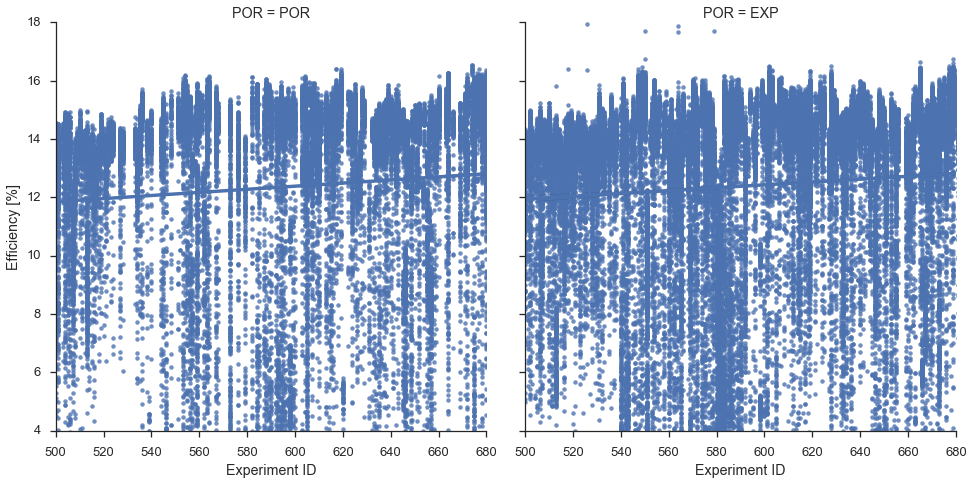

In [44]:
#import seaborn as sns
sns.set(style="ticks", context="talk")

plt.figure(2, figsize=(12,10))

# Make a custom sequential palette using the cubehelix system
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)

# Plot tip as a function of toal bill across days
b = sns.lmplot(x='Experiment_ID', y='percentEff', col='POR', data=cell_trends,
               palette=pal, size=7)

# Use more informative axis labels than are provided by default
b.set_axis_labels("Experiment ID", "Efficiency [%]")
plt.xlim(500,680)
plt.ylim(4, 18)

In [45]:
#dff.groupby('B').filter(lambda x: len(x['C']) > 2)
#groupedcells = cell_trends.groupby(['Experiment_ID', 'POR', 'Measurement']).filter(lambda x: )
#groupedcells = groupedcells.drop('Eff')

#del celldf
#del groupedcell 

celldf = cell_trends.drop(['Eff', 'NumCells', 'FF', 'I0_nA', 'n', 'Pmp_fit_ratio'], axis=1)
celldf = celldf[~celldf['Measurement'].str.contains('.*Dark.*', na = False)]
celldf.head()

moddf = mod_trends.drop(['Eff', 'NumCells', 'FF', 'I0_nA', 'n', 'Pmp_fit_ratio'], axis=1)
moddf = moddf[~moddf['Measurement'].str.contains('.*Dark.*', na = False)]
moddf.head()

#setting up grouped median and mean dfs
groupmoddf = moddf.groupby('Experiment_ID', as_index=False)
modmedian = groupmoddf.median()
modmean = groupmoddf.mean()


groupcelldf = celldf.groupby('Experiment_ID', as_index=False)
cellmedian = groupcelldf.median()
cellmean = groupcelldf.mean()

#list(cellmedian.columns.values)

(0, 430)

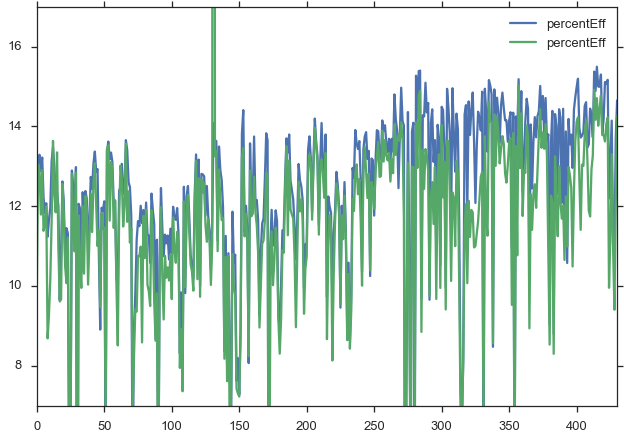

In [46]:
#ax = df1.plot() method to plot 2 dfs on same plot
#df2.plot(ax=ax)

plt.figure(2, figsize=(15,10))
ax = cellmedian.plot( y=[15], label = 'median Eff')
cellmean.plot(ax=ax, y=[15], label = 'mean Eff' )
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines[:2], labels[:2], loc='best')
plt.ylim(7,17)
plt.xlim(0, 430)

(620, 700)

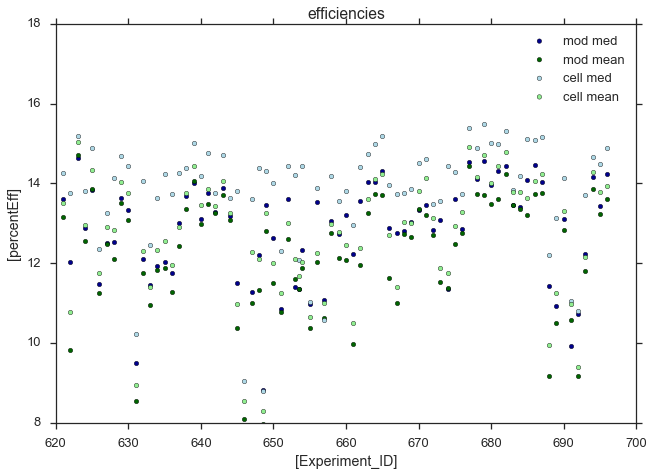

In [47]:
plt.figure(2, figsize=(14,8))

ax = modmedian.plot(kind='scatter', x=['Experiment_ID'], y=['percentEff'], label = 'mod med', color = 'DarkBlue', title = 'mod efficiencies')
modmean.plot(ax=ax, x=['Experiment_ID'], y=['percentEff'], label = 'mod mean', kind ='scatter', color = 'DarkGreen')
cellmedian.plot(ax=ax, kind='scatter', x=['Experiment_ID'], y=['percentEff'], label = 'cell med', color = 'LightBlue', title = 'efficiencies')
cellmean.plot(ax=ax, x=['Experiment_ID'], y=['percentEff'], label = 'cell mean', kind ='scatter', color = 'LightGreen')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines[:4], labels[:4], loc='upper right')
plt.ylim(8,18)
plt.xlim(620, 700)

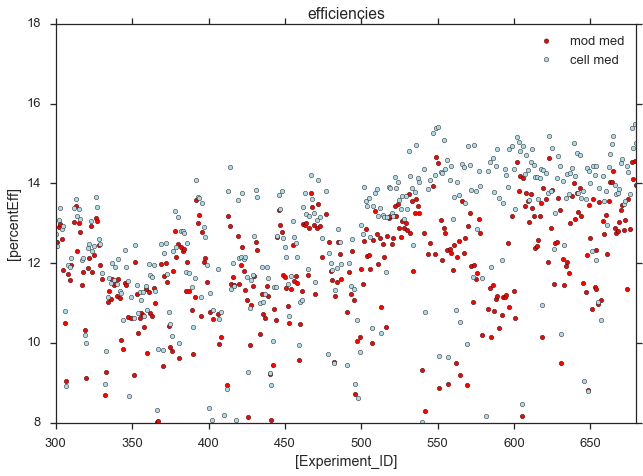

In [48]:
#median = median.reset_index()
#mean = mean.reset_index()
plt.figure(figsize=(12,10))

ax = modmedian.plot(kind='scatter', x=['Experiment_ID'], y=['percentEff'], label = 'mod med', color = 'Red')
cellmedian.plot(ax=ax, kind='scatter', x=['Experiment_ID'], y=['percentEff'], label = 'cell med', color = 'LightBlue')
lines, labels = ax.get_legend_handles_labels()
plt.ylim(8,18)
plt.xlim(300, 680)
plt.title('efficiencies')

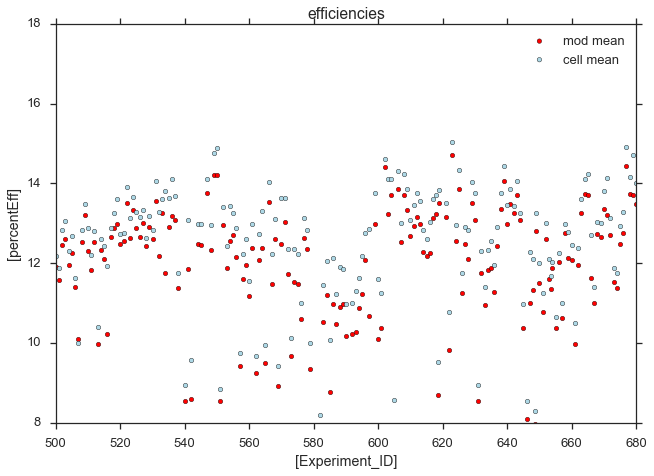

In [49]:
plt.figure(figsize=(12,10))

ax = modmean.plot(kind='scatter', x=['Experiment_ID'], y=['percentEff'], label = 'mod mean', color = 'Red')
cellmean.plot(ax=ax, kind='scatter', x=['Experiment_ID'], y=['percentEff'], label = 'cell mean', color = 'LightBlue')
lines, labels = ax.get_legend_handles_labels()
plt.ylim(8,18)
plt.xlim(500, 680)
plt.title('efficiencies')

In [50]:
allmed1 = pd.merge(modmedian, cellmedian, on='Experiment_ID')
allmed1['del_percentEff'] = allmed1['percentEff_x'] - allmed1['percentEff_y']
allmed1['del_percentFF'] = allmed1['percentFF_x'] - allmed1['percentFF_y']

plt.figure(2, figsize=(25,20))

ax = allmed1.plot(kind = 'scatter', x=['Experiment_ID'], y=['del_percentFF'], label = 'del FF mod-cell', color = 'DarkRed')
allmed1.plot(ax=ax, kind='scatter', x=['Experiment_ID'], y=['del_percentEff'], label = 'del eff mod-cell', color = 'LightBlue')
#allmed1.plot(ax=ax, kind='scatter', x=['Experiment_ID'], y=['del_voc'], label = 'del eff mod-cell med', color = 'LightBlue')
lines, labels = ax.get_legend_handles_labels()
plt.axhline(0, color='k', linestyle='--')
plt.axhline(-5, color='b', linestyle='--')
plt.axhline(-10, color='r', linestyle='--')
plt.ylim(-12,8)
plt.xlim(650, 700)
plt.title('median del')



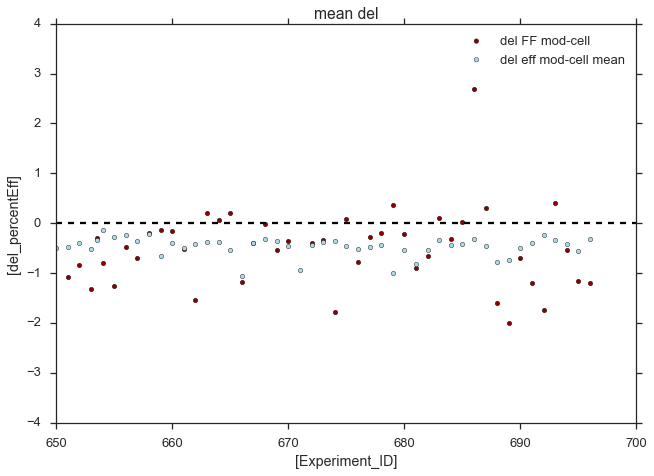

In [51]:
#del allmed
#allmed = pd.merge(modmedian, cellmedian, on='Experiment_ID')
allmed = pd.concat([modmedian, cellmedian])

allmean1 = pd.merge(modmean, cellmean, on='Experiment_ID')
allmean1['del_percentEff'] = allmean1['percentEff_x'] - allmean1['percentEff_y']
allmean1['del_percentFF'] = allmean1['percentFF_x'] - allmean1['percentFF_y']

plt.figure(figsize=(20,20))
ax = allmean1.plot(kind = 'scatter', x=['Experiment_ID'], y=['del_percentFF'], label = 'del FF mod-cell', color = 'DarkRed')
allmean1.plot(ax=ax, kind='scatter', x=['Experiment_ID'], y=['del_percentEff'], label = 'del eff mod-cell mean', color = 'LightBlue')
#allmed1.plot(ax=ax, kind='scatter', x=['Experiment_ID'], y=['del_voc'], label = 'del eff mod-cell med', color = 'LightBlue')
lines, labels = ax.get_legend_handles_labels()
plt.axhline(0, color='k', linestyle='--')
plt.axhline(-5, color='b', linestyle='--')
plt.axhline(-10, color='r', linestyle='--')
plt.ylim(-4,4)
plt.xlim(650, 700)
plt.title('mean del')

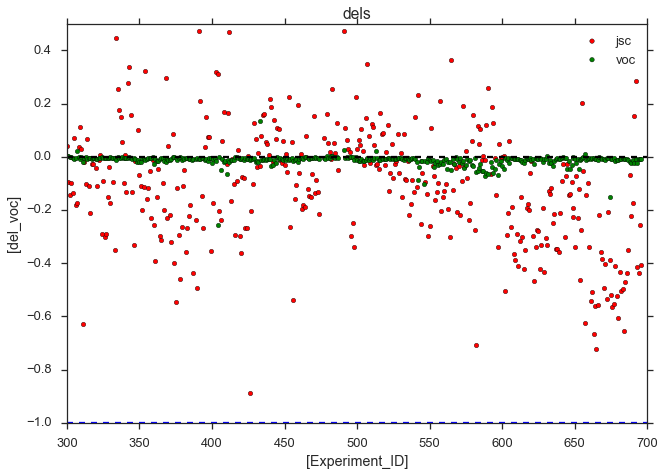

In [52]:
allmed1['del_voc'] = allmed1['modVoc'] - allmed1['cellVoc']
allmed1['del_jsc'] = allmed1['modJsc'] - allmed1['cellJsc']

plt.figure(figsize=(18,10))


ax = allmed1.plot(kind = 'scatter', x=['Experiment_ID'], y=['del_jsc'], label = 'jsc', color = 'Red')
allmed1.plot(ax=ax, kind='scatter', x=['Experiment_ID'], y=['del_voc'], label = 'voc', color = 'Green')
lines, labels = ax.get_legend_handles_labels()
plt.axhline(0, color='k', linestyle='--')
plt.axhline(-1, color='b', linestyle='--')
plt.axhline(-2, color='r', linestyle='--')
plt.ylim(-1,0.5)
plt.xlim(300, 700)
plt.title('dels')

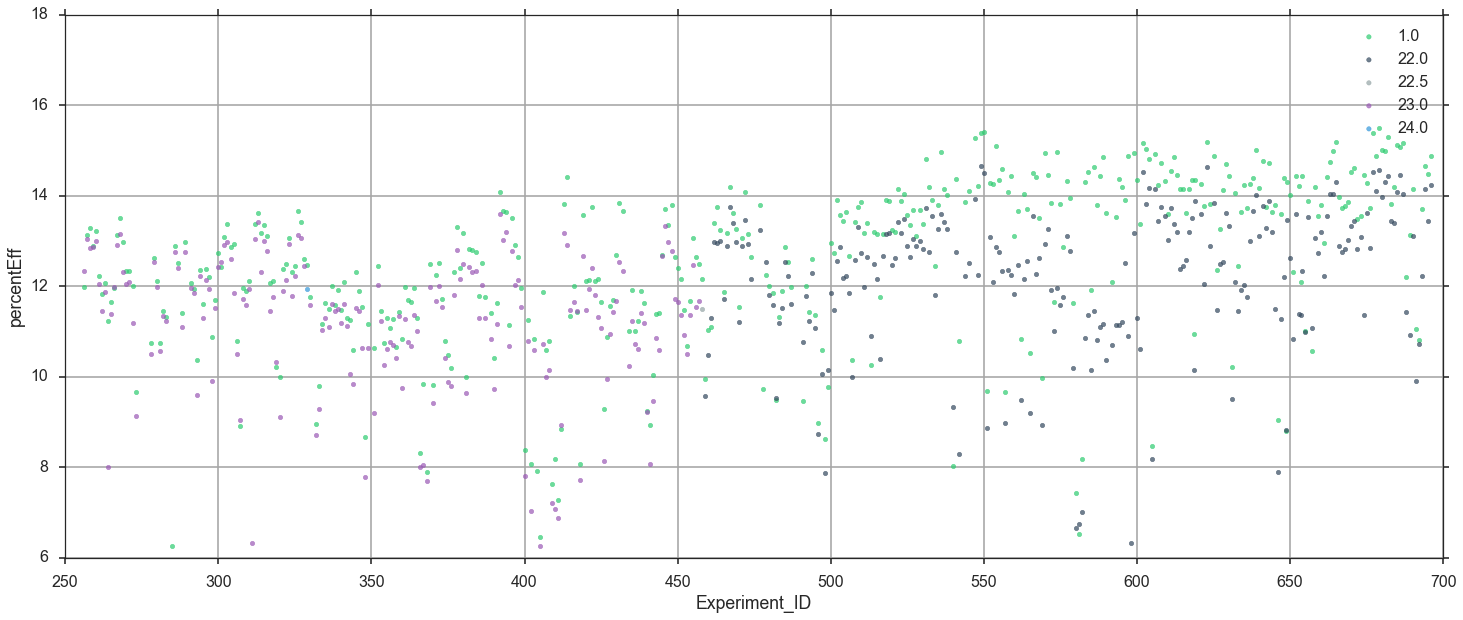

In [53]:
sns.set(style='ticks')
sns.set_palette("coolwarm")
sns.set_context("poster")
flatui1 = ["#2ecc71", "#34495e", "#95a5a6", "#9b59b6", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)
#fig, ax = plt.subplots(figsize=(15, 15))
# the size of A4 paper
#plt.figure(figsize=(20, 20))


fg = sns.FacetGrid(allmed, hue='Cell_Count', size= 9, aspect=2.3,despine=False)#, hue_kws=dict(marker=["^", "v"]))
fg.map(plt.scatter, 'Experiment_ID', 'percentEff', alpha=.7,)
plt.xlim(250,700)
plt.ylim(6, 18)
#plt.axhline(15.5, color='k', linestyle='--')
#plt.axhline(14.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()


(6, 18)

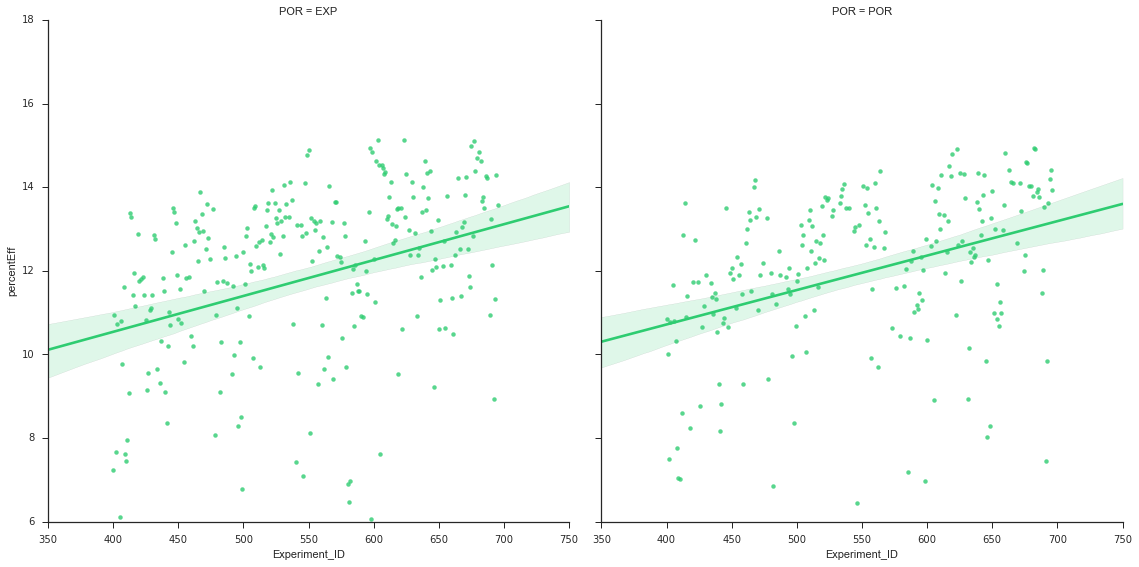

In [54]:
#del groupedcells

celltrendstrimmed = cell_trends[(cell_trends['Experiment_ID'] >= 400) & (cell_trends['Experiment_ID'] < 700)]
groupedcells = celltrendstrimmed.groupby(['Experiment_ID', 'POR'],as_index=False)

groupedmean = groupedcells.aggregate(np.mean)
#groupedmean = groupedmean.reset_index()

#groupedmean
#groupedmean.info()
#print(groupedmean.columns)

sns.set_context("notebook")
plt.figure(figsize=(10, 10))
p = sns.lmplot(x="Experiment_ID", y="percentEff",  data=groupedmean, col ="POR", size=8)
plt.ylim(6,18)

In [55]:
b = pd.DataFrame(mod_trends.groupby(['Experiment_ID'], as_index=False)['shunt_count'].sum())

b.sort_values(by='Experiment_ID')
b.head()
plt.figure(figsize=(15, 8))

sns.barplot(x='Experiment_ID', y='shunt_count', data=b)
plt.xlim(200.5, 405.5)
plt.ylim(0,30)
plt.xticks(rotation=30)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

(0, 40)

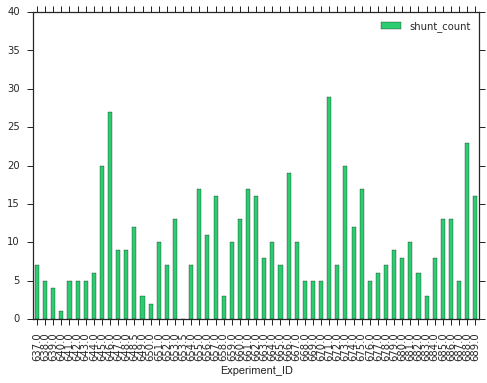

In [56]:
plt.figure(figsize=(15, 8))
b.plot(x='Experiment_ID', y='shunt_count', kind='bar')
plt.xlim(370.5, 425.5)
plt.ylim(0,40)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

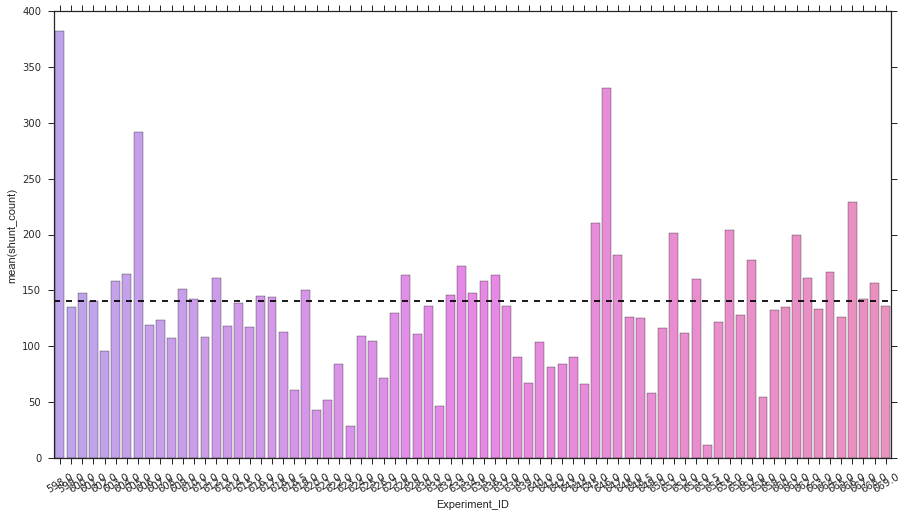

In [57]:
b1 = pd.DataFrame(cell_trends.groupby(['Experiment_ID'], as_index=False)['shunt_count'].sum())

b1.sort_values(by='Experiment_ID')
b1.head()
plt.figure(figsize=(15, 8))

sns.barplot(x='Experiment_ID', y='shunt_count', data=b1)
plt.axhline(7*20, color='k', linestyle='--')
plt.xlim(330.5, 405.5)
plt.ylim(0,400)
plt.xticks(rotation=30)


#b1.plot(x='Experiment_ID', y='shunt_count', kind='bar')

(0, 400)

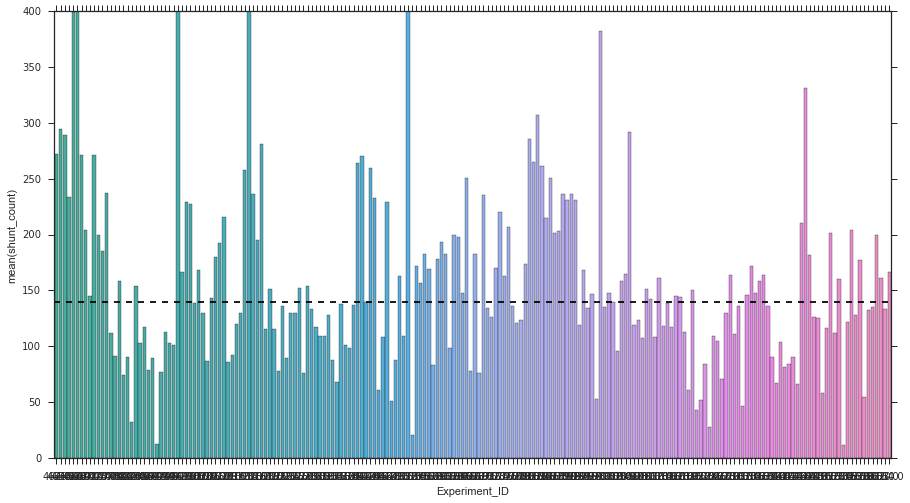

In [58]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Experiment_ID', y='shunt_count', data=b1)
plt.axhline(7*20, color='k', linestyle='--')
plt.xlim(200.5, 400.5)
plt.ylim(0,400)

In [59]:
#del groupedcells
#del groupedcells1

groupedcells = cell_trends.groupby(['Experiment_ID', 'POR'], as_index=False )
groupedcells = groupedcells.describe().unstack()
groupedcells1 = groupedcells.reset_index()
groupedcells1.head()

c:\anaconda3\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning:

Invalid value encountered in percentile



index Experiment_ID                                                 \
                count   mean  std    min    25%    50%    75%    max   
0     0         368.0  256.0  0.0  256.0  256.0  256.0  256.0  256.0   
1     1         382.0  256.0  0.0  256.0  256.0  256.0  256.0  256.0   
2     2         372.0  257.0  0.0  257.0  257.0  257.0  257.0  257.0   
3     3         368.0  258.0  0.0  258.0  258.0  258.0  258.0  258.0   
4     4         460.0  259.0  0.0  259.0  259.0  259.0  259.0  259.0   

  Cell_Area_mm2                                                           \
          count        mean           std      min     25%    50%    75%   
0         368.0  588.485812  1.505314e+02    6.273  627.30  627.3  627.3   
1         382.0  457.903555  2.737436e+02    6.273   24.93  627.3  627.3   
2         372.0  620.822903  6.220980e+01   24.930  627.30  627.3  627.3   
3         368.0  627.300000  3.870615e-12  627.300  627.30  627.3  627.3   
4         460.0  503.094600  2.486813e+02    6.273  627.30  627.3  627.3   

         Cell_Count                                    Cell_no             \
     max      count mean  std  min  25%  50%  75%  max   count       mean   
0  627.3      368.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   368.0  12.000000   
1  627.3      382.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   382.0  10.272251   
2  627.3      372.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   372.0  12.013441   
3  627.3      368.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   368.0  12.000000   
4  627.3      460.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   460.0  12.000000   

                                          Eff                               \
        std  min  25%   50%   75%   max count mean std min 25% 50% 75% max   
0  6.642281  1.0  6.0  12.0  18.0  23.0   0.0  NaN NaN NaN NaN NaN NaN NaN   
1  7.297158  1.0  3.0  10.0  17.0  23.0   0.0  NaN NaN NaN NaN NaN NaN NaN   
2  6.633845  1.0  6.0  12.0  18.0  23.0   0.0  NaN NaN NaN NaN NaN NaN NaN   
3  6.642281  1.0  6.0  12.0  18.0  23.0   0.0  NaN NaN NaN NaN NaN NaN NaN   
4  6.640471  1.0  6.0  12.0  18.0  23.0   0.0  NaN NaN NaN NaN NaN NaN NaN   

  Efficiency                                                        FF       \
       count      mean       std       min 25% 50% 75%       max count mean   
0      184.0  0.118582  0.027115  0.026300 NaN NaN NaN  0.148900   0.0  NaN   
1      221.0  0.080979  0.057160  0.003100 NaN NaN NaN  0.152799   0.0  NaN   
2      184.0  0.130514  0.008845  0.106000 NaN NaN NaN  0.150700   0.0  NaN   
3      184.0  0.129047  0.013166  0.034600 NaN NaN NaN  0.147900   0.0  NaN   
4      230.0  0.117905  0.024860  0.006454 NaN NaN NaN  0.147600   0.0  NaN   

                          FillFactor                                        \
  std min 25% 50% 75% max      count      mean       std       min 25% 50%   
0 NaN NaN NaN NaN NaN NaN      184.0  0.630413  0.104214  0.303300 NaN NaN   
1 NaN NaN NaN NaN NaN NaN      221.0  0.467424  0.250893  0.005448 NaN NaN   
2 NaN NaN NaN NaN NaN NaN      184.0  0.671086  0.031234  0.586500 NaN NaN   
3 NaN NaN NaN NaN NaN NaN      184.0  0.663425  0.054516  0.244100 NaN NaN   
4 NaN NaN NaN NaN NaN NaN      230.0  0.639222  0.074949  0.250985 NaN NaN   

                Isc_mA                                                 \
  75%       max  count        mean        std         min 25% 50% 75%   
0 NaN  0.743845  184.0  150.484939   5.936031  129.320000 NaN NaN NaN   
1 NaN  0.736368  221.0  106.493791  65.297835    3.158914 NaN NaN NaN   
2 NaN  0.727200  184.0  151.834076   4.386037  142.630000 NaN NaN NaN   
3 NaN  0.720600  184.0  151.082935   2.660760  144.400000 NaN NaN NaN   
4 NaN  0.720500  230.0  148.810972   5.505934  124.756396 NaN NaN NaN   

             NumCells                              Pmp_fit_ratio            \
         max    count mean std min 25% 50% 75% max         count      mean   
0  168.35000      0.0  NaN NaN NaN NaN NaN NaN NaN         161.0  0.993911   
1  169.07000      0.0  NaN NaN

In [60]:
ma = Series.rolling(celldf.percentEff, center=False,window=30).mean()
mstd = pd.rolling_std(celldf.percentEff, 30)

plt.figure()


plt.plot(celldf.index, celldf.percentEff, 'k')
plt.plot(ma.index, ma, 'b')
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)
plt.xlim(500,660)
plt.ylim(0,25)

NameError: name 'Series' is not defined

In [ ]:
print(trends.loc[trends['Experiment ID'] == '672'])

In [ ]:
ed.head()